# CSCI316 - Group Assignment 1 (Group 7)

## Group Members:


*   Wootaek Lim (7898848)
*   Chew Wei Hong (7911130)
*   Minseo Yun (8225746)
*   Yam Shi Xuan Jonathan (8380053)


---



## Objective
>The objective of this task is to develop an end-to-end data mining project by using the Python machine learning library Scikit-Learn

## Task
>Given a person’s credit-related information, build a machine learning model that can classify the credit score.

## Algorithm used:

1.   **Naïve Bayes**
2.   **Artificial Neural Networks (ANN)**
3.   **k-Nearest Neighbors (kNN)**
4.   **Random Forest**

##  User Defined Features
1.   **Outstanding_Debt/Monthly_Balance** - it represents a debt ratio on monthly balance.
2.   **Late_Payment_Frequency** -  This shows how many days later this customer is than the mean overdue date
3.   **Additional_Interest_For_Month** - This represents the additional interest amount for month, by multiplying outstanding debt and interest rate


## Table of contents




1.   Summary
2.   Importing Related Libraries
3.   Data Exploration
4.   Data Pre-processing
5.   Implementing the different models
6.   Model Evaluation






---



# 1. Summary

The goal of the Credit Score Classification project was to provide a reliable and precise method for credit score classification.

In order to obtain understanding of the dataset, the project started with an exploratory data analysis (EDA) phase. After the EDA, missing value management, duplication removal, and fixing any flaws or inconsistencies in the dataset were all part of the data cleaning process. To prepare the data for modeling, further data transformation techniques were used, such as feature scaling and categorical variable encoding.

The goal of the model creation and assessment phase was to create at least classification models that could correctly predict the categories of credit scores. Four algorithms, including  **random forests, naïve bayes, KNN, and ANN** were tested and their performance assessed. To address the issue of class imbalance, techniques such as resampling the minority classes was employed. Metrics like accuracy, precision, recall, and F1-score were evaluated as part of the model evaluation process to gauge the model's performance and make sure it could accurately identify credit ratings.



---



# 2. Importing Related Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Libraries related to models and classifiers will imported in the respective parts

# 3. Data Exploration

## Getting basic understanding of the data set

In [2]:
preview_dataframe = pd.read_csv('train.csv')

In [3]:
preview_dataframe.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [4]:
print(f"Train data size: {preview_dataframe.shape}")

Train data size: (100000, 28)


In [5]:
preview_dataframe.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
preview_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
preview_dataframe.describe().T

count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     5.000000     7.000000   1499.000000  
Interest_Rate                8.000000    13.000000    20.000000   5797.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         3.000000     6.000000     9.000000   2597.000000  
Credit_Utilization_Ratio    28.052567    32.305784    36.496663     50.000000  
Total_EMI_per_month         30.306660    69.249473   161.224249  82331.000000

In [8]:
preview_dataframe.describe(exclude = np.number).T

count  unique                               top  \
ID                       100000  100000                           0x25fb6   
Customer_ID              100000   12500                        CUS_0x942c   
Month                    100000       8                           January   
Name                      90015   10139                            Langep   
Age                      100000    1788                                38   
SSN                      100000   12501                         #F%$D@*&8   
Occupation               100000      16                           _______   
Annual_Income            100000   18940                          20867.67   
Num_of_Loan              100000     434                                 3   
Type_of_Loan              88592    6260                     Not Specified   
Num_of_Delayed_Payment    92998     749                                19   
Changed_Credit_Limit     100000    4384                                 _   
Credit_Mix               100000       4                          Standard   
Outstanding_Debt         100000   13178                           1360.45   
Credit_History_Age        90970     404            15 Years and 11 Months   
Payment_of_Min_Amount    100000       3                               Yes   
Amount_invested_monthly   95521   91049                         __10000__   
Payment_Behaviour        100000       7    Low_spent_Small_value_payments   
Monthly_Balance           98800   98792  __-333333333333333333333333333__   
Credit_Score             100000       3                          Standard   

                          freq  
ID                           1  
Customer_ID                  8  
Month                    12500  
Name                        44  
Age                       2833  
SSN                       5572  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

In [9]:
preview_dataframe.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64



---

## **Findings**


1.   There are missing values
2.   Train dataset has both numerical and string values
3.   There are odd valus (#F%$D@*&8, _____, !@9#%8, etc)
4.   ***Customer_ID*** has ***12500*** unique values. It means we have data of 12500 customers.
5.   ***Month*** has only ***8*** unique values.
6.   ***Age*** has ***1788*** unique values. This looks strange as general age range is from ***0-100***.
7.   ***SSN*** has ***12501*** unique values, whereas ***Customer_ID*** only has only ***12500*** unique values. There is a possibility that incorrect SSN value is entered for one of the customer as same person can't have multiple SSN.


---






## Getting into deeper details of each attributes - Categorical

In [10]:
# function for displaying column details
def get_column_detail(df, column):
  print("**"*20)
  print()
  print(f"Details of column [{column}]")

  #column data type
  print(f"\nData Type: {df[column].dtype}")

  #check null values
  null_numbers = df[column].isnull().sum()

  if null_numbers == 0:
    print("\nThere is no null value")
  elif null_numbers > 0 :
    print(f"\nThere are {null_numbers} null values")

  #displaying info about unique values
  print(f"\nNumber of Unique Values: {df[column].nunique()}")

  #displaying distribution of Column
  print("\nDistribution of column: \n")
  print(df[column].value_counts(dropna = False))
  print()
  print("**"*20)

In [11]:
# function for displaying distribution of 2 columns
def cross_plot(df, column1, column2, rotation = 0):
  print("**"*20)
  print(f"distribution plot of {column1} and {column2}")

  pd.crosstab(df[column1], df[column2]).plot(kind = 'bar', stacked = True)

  plt.xlabel(f'{column1}')
  plt.ylabel('Number of Records')
  plt.title(f'{column1} & {column2} Distribution')
  plt.xticks(rotation=rotation)

In [12]:
def displot_plot(df, column, rotation=0, bins=20):
    print("**"*20)
    print(f'\n{column} Distribution')

    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [13]:
Target_att = 'Credit_Score'

### 01. Credit_Score

Findings:
*   class value is imbalanced



In [14]:
get_column_detail(preview_dataframe, 'Credit_Score')

****************************************

Details of column [Credit_Score]

Data Type: object

There is no null value

Number of Unique Values: 3

Distribution of column: 

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

****************************************


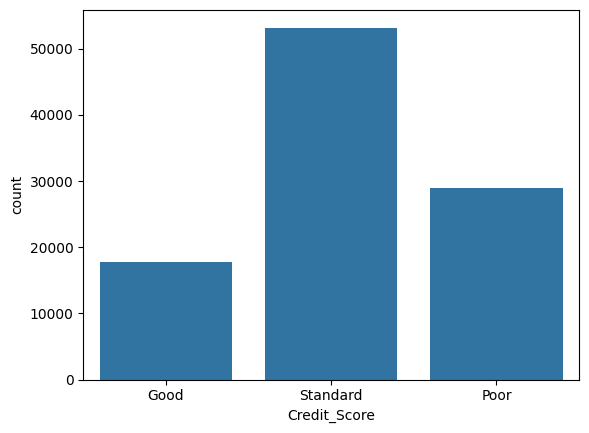

In [15]:
sns.countplot(preview_dataframe, x = 'Credit_Score')
plt.show()

### 02. Month

In [16]:
get_column_detail(preview_dataframe, 'Month')

****************************************

Details of column [Month]

Data Type: object

There is no null value

Number of Unique Values: 8

Distribution of column: 

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

****************************************


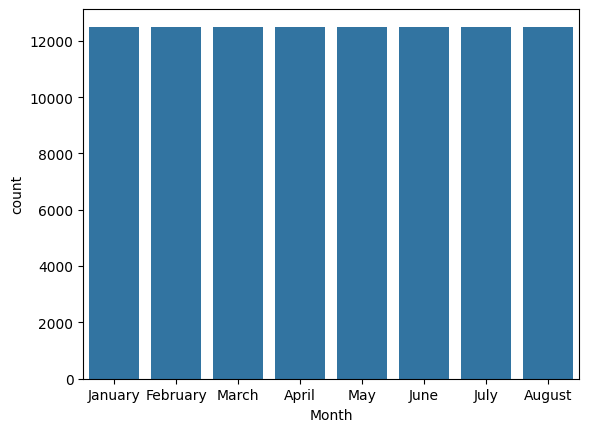

In [17]:
sns.countplot(preview_dataframe, x = 'Month')
plt.show()

****************************************
distribution plot of Month and Credit_Score


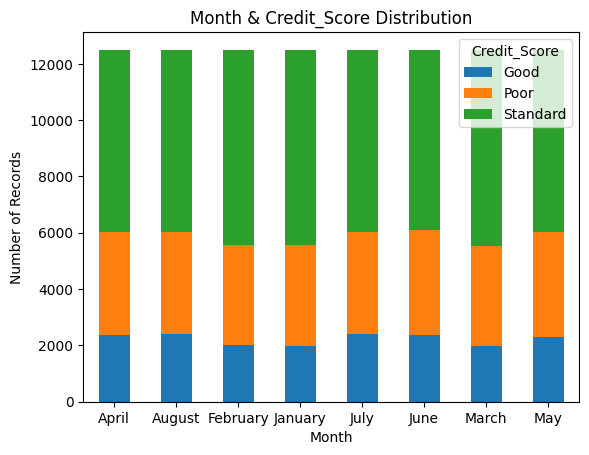

In [18]:
cross_plot(preview_dataframe, 'Month', Target_att)

### 03. Occupation

Findings:
*   value '______' needs to be replaced

In [19]:
get_column_detail(preview_dataframe, 'Occupation')

****************************************

Details of column [Occupation]

Data Type: object

There is no null value

Number of Unique Values: 16

Distribution of column: 

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

****************************************


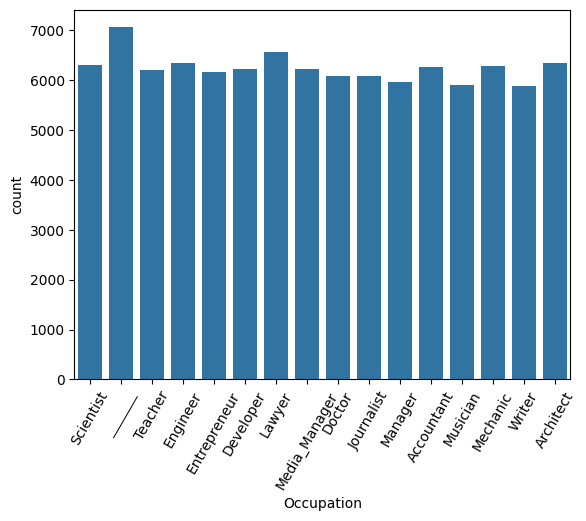

In [20]:
sns.countplot(preview_dataframe, x = 'Occupation')
plt.xticks(rotation = 60)
plt.show()

****************************************
distribution plot of Occupation and Credit_Score


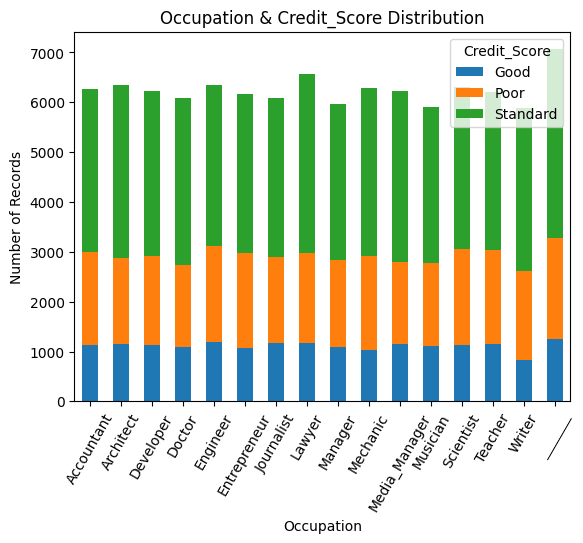

In [21]:
cross_plot(preview_dataframe, 'Occupation', Target_att, rotation = 60)

### 04. Type of Loan

Findings:
*   null values

In [22]:
get_column_detail(preview_dataframe, 'Type_of_Loan')

****************************************

Details of column [Type_of_Loan]

Data Type: object

There are 11408 null values

Number of Unique Values: 6260

Distribution of column: 

Type_of_Loan
NaN                                                                                                                                   11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                          

### **05. Credit Mix**

Findings:
*   it seems higly correlated to "Credit score"
*   "-" needs to be replaced

In [23]:
get_column_detail(preview_dataframe, 'Credit_Mix')

****************************************

Details of column [Credit_Mix]

Data Type: object

There is no null value

Number of Unique Values: 4

Distribution of column: 

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

****************************************


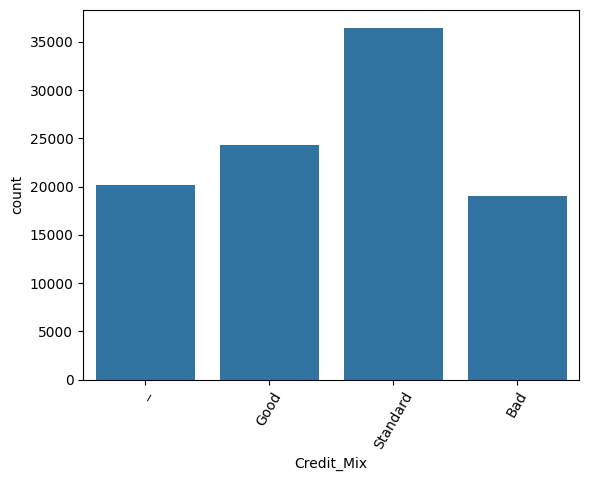

In [24]:
sns.countplot(preview_dataframe, x = 'Credit_Mix')
plt.xticks(rotation = 60)
plt.show()

****************************************
distribution plot of Credit_Mix and Credit_Score


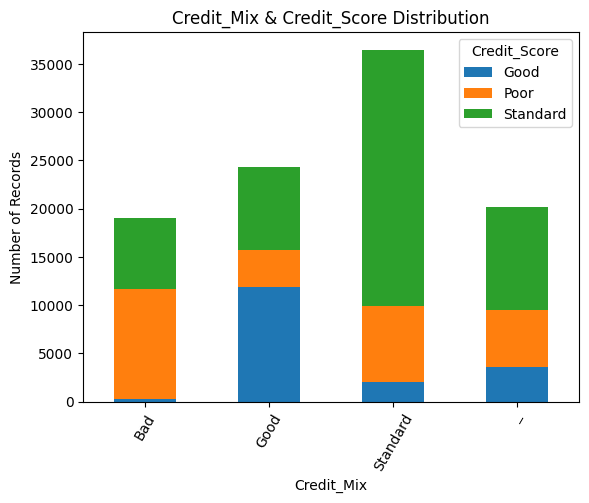

In [25]:
cross_plot(preview_dataframe, 'Credit_Mix', Target_att, rotation = 60)

### **06. Payment of Min amount**

Findings:
*   it seems higly correlated to "Credit score"

In [26]:
get_column_detail(preview_dataframe, 'Payment_of_Min_Amount')


****************************************

Details of column [Payment_of_Min_Amount]

Data Type: object

There is no null value

Number of Unique Values: 3

Distribution of column: 

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

****************************************


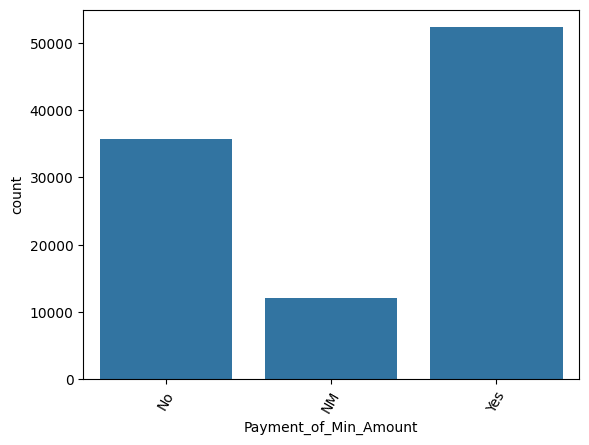

In [27]:
sns.countplot(preview_dataframe, x = 'Payment_of_Min_Amount')
plt.xticks(rotation = 60)
plt.show()

****************************************
distribution plot of Payment_of_Min_Amount and Credit_Score


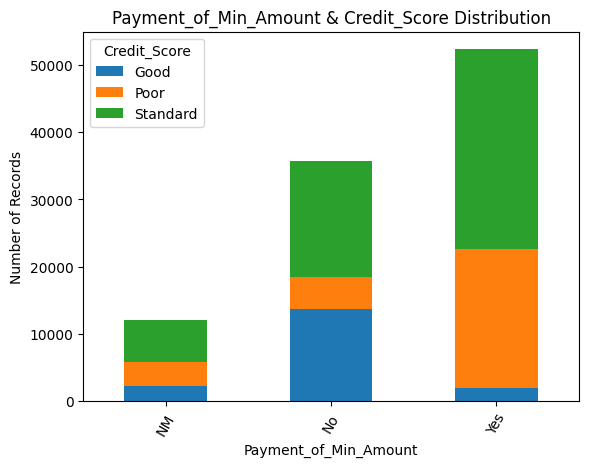

In [28]:
cross_plot(preview_dataframe, 'Payment_of_Min_Amount', Target_att, rotation = 60)

### 07. Payment Behaviour

Findings:
*   strange value: !@9#%8

In [29]:
get_column_detail(preview_dataframe, 'Payment_Behaviour')

****************************************

Details of column [Payment_Behaviour]

Data Type: object

There is no null value

Number of Unique Values: 7

Distribution of column: 

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

****************************************


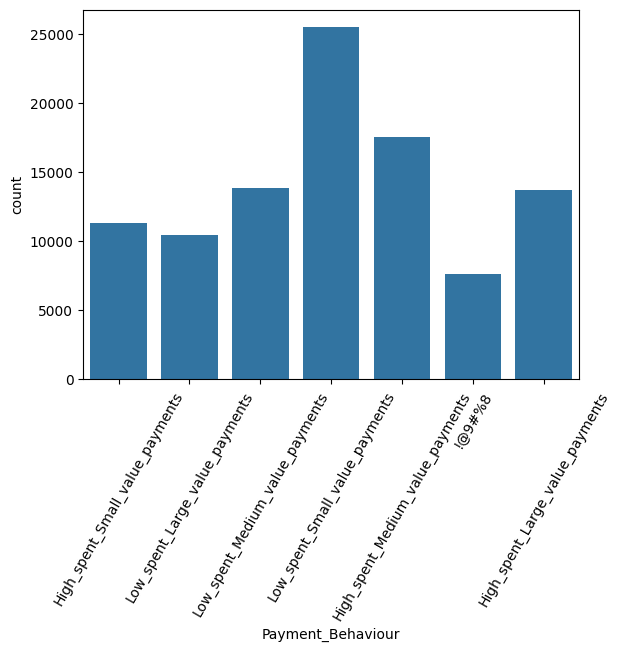

In [30]:
sns.countplot(preview_dataframe, x = 'Payment_Behaviour')
plt.xticks(rotation = 60)
plt.show()

****************************************
distribution plot of Payment_Behaviour and Credit_Score


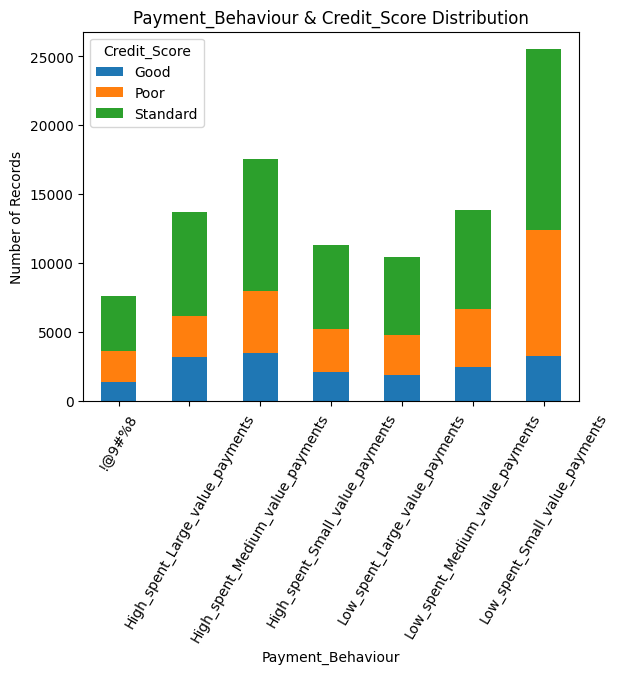

In [31]:
cross_plot(preview_dataframe, 'Payment_Behaviour', Target_att, rotation = 60)

## Getting into deeper details of each attributes - Numerical

### 01. Age

Findings:
*   age above 100 or below 0 should be replaced

In [32]:
get_column_detail(preview_dataframe, 'Age')

****************************************

Details of column [Age]

Data Type: object

There is no null value

Number of Unique Values: 1788

Distribution of column: 

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
325        1
6611       1
3779       1
5751       1
3966       1
Name: count, Length: 1788, dtype: int64

****************************************


### 02. Annual Income

In [33]:
get_column_detail(preview_dataframe, 'Annual_Income')

****************************************

Details of column [Annual_Income]

Data Type: object

There is no null value

Number of Unique Values: 18940

Distribution of column: 

Annual_Income
20867.67      16
17273.83      16
36585.12      16
9141.63       15
33029.66      15
              ..
3874136.0      1
42588.14_      1
32291.88_      1
28730.26_      1
17770.795_     1
Name: count, Length: 18940, dtype: int64

****************************************


### 03. Monthly_Inhand_Salary

Findings:
*   null values

In [34]:
get_column_detail(preview_dataframe, 'Monthly_Inhand_Salary')

****************************************

Details of column [Monthly_Inhand_Salary]

Data Type: float64

There are 15002 null values

Number of Unique Values: 13235

Distribution of column: 

Monthly_Inhand_Salary
NaN            15002
6769.130000       15
2295.058333       15
6082.187500       15
6358.956667       15
               ...  
1698.145919        1
1515.410833        1
1465.444744        1
1879.396612        1
2760.869167        1
Name: count, Length: 13236, dtype: int64

****************************************


****************************************

Monthly_Inhand_Salary Distribution


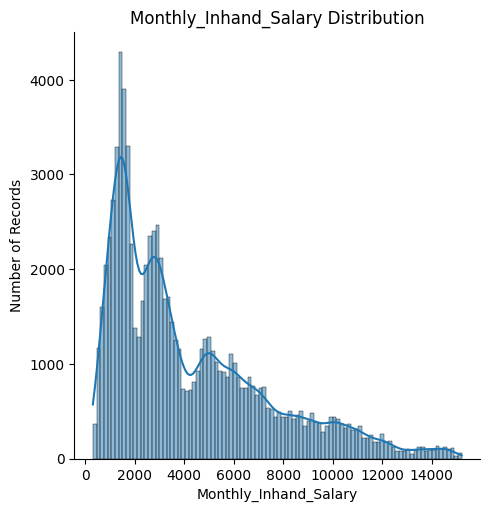

In [35]:
displot_plot(preview_dataframe, 'Monthly_Inhand_Salary', bins=100)

### 04. Num Bank Accounts

Findings:
*   outliers should be replaced

In [36]:
get_column_detail(preview_dataframe, 'Num_Bank_Accounts')

****************************************

Details of column [Num_Bank_Accounts]

Data Type: int64

There is no null value

Number of Unique Values: 943

Distribution of column: 

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
665         1
1388        1
1429        1
1588        1
1777        1
Name: count, Length: 943, dtype: int64

****************************************


****************************************

Num_Bank_Accounts Distribution


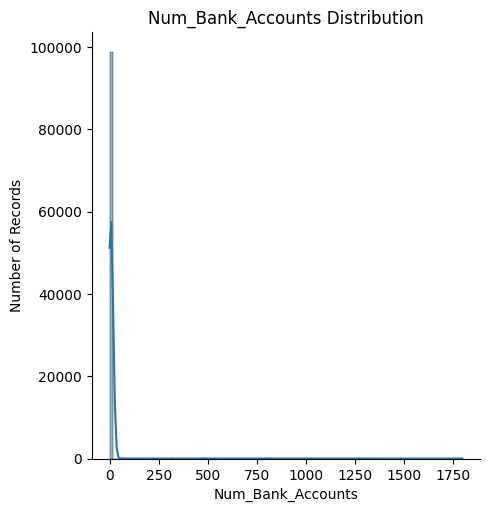

In [37]:
displot_plot(preview_dataframe, 'Num_Bank_Accounts', bins=100)

### 05. Num_Credit_Card

Findings:
*   outliers should be replaced

In [38]:
get_column_detail(preview_dataframe, 'Num_Credit_Card')

****************************************

Details of column [Num_Credit_Card]

Data Type: int64

There is no null value

Number of Unique Values: 1179

Distribution of column: 

Num_Credit_Card
5      18459
7      16615
6      16559
4      14030
3      13277
       ...  
551        1
426        1
784        1
673        1
599        1
Name: count, Length: 1179, dtype: int64

****************************************


****************************************

Num_Credit_Card Distribution


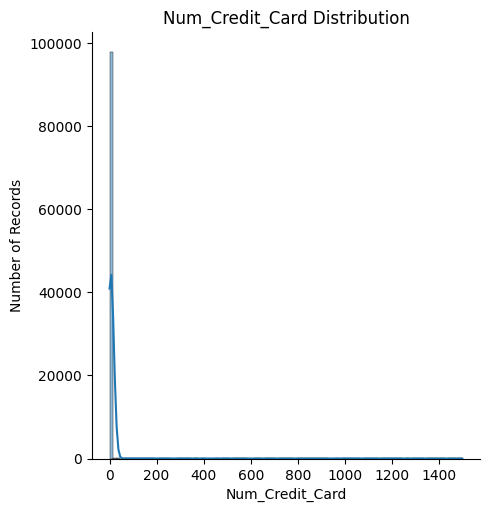

In [39]:
displot_plot(preview_dataframe, 'Num_Credit_Card', bins=100)

### 06. Interest_Rate

Findings:
*   outliers should be replaced

In [40]:
get_column_detail(preview_dataframe, 'Interest_Rate')

****************************************

Details of column [Interest_Rate]

Data Type: int64

There is no null value

Number of Unique Values: 1750

Distribution of column: 

Interest_Rate
8       5012
5       4979
6       4721
10      4540
12      4540
        ... 
3782       1
3849       1
2206       1
4828       1
1683       1
Name: count, Length: 1750, dtype: int64

****************************************


****************************************

Interest_Rate Distribution


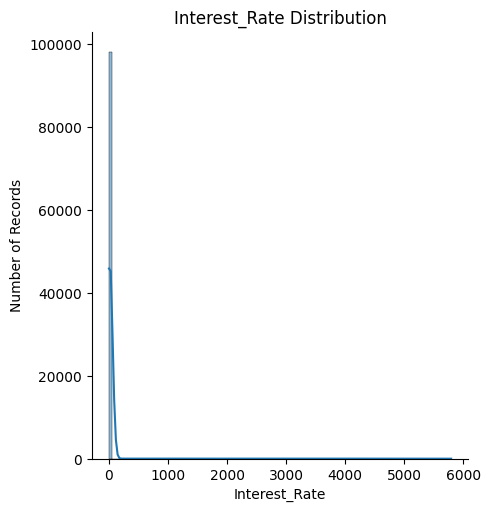

In [41]:
displot_plot(preview_dataframe, 'Interest_Rate', bins=100)

### 07. Delay_from_due_date

Findings:
*   outliers should be replaced

In [42]:
get_column_detail(preview_dataframe, 'Delay_from_due_date')

****************************************

Details of column [Delay_from_due_date]

Data Type: int64

There is no null value

Number of Unique Values: 73

Distribution of column: 

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

****************************************


****************************************

Delay_from_due_date Distribution


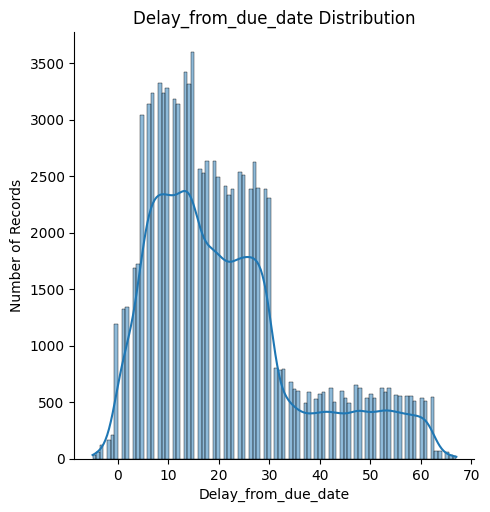

In [43]:
displot_plot(preview_dataframe, 'Delay_from_due_date', bins=100)

### 08. Num_Credit_Inquiries

Findings:
*   outlier should be replaced
*   null values

In [44]:
get_column_detail(preview_dataframe, 'Num_Credit_Inquiries')

****************************************

Details of column [Num_Credit_Inquiries]

Data Type: float64

There are 1965 null values

Number of Unique Values: 1223

Distribution of column: 

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
719.0         1
2239.0        1
2001.0        1
1953.0        1
2473.0        1
Name: count, Length: 1224, dtype: int64

****************************************


****************************************

Num_Credit_Inquiries Distribution


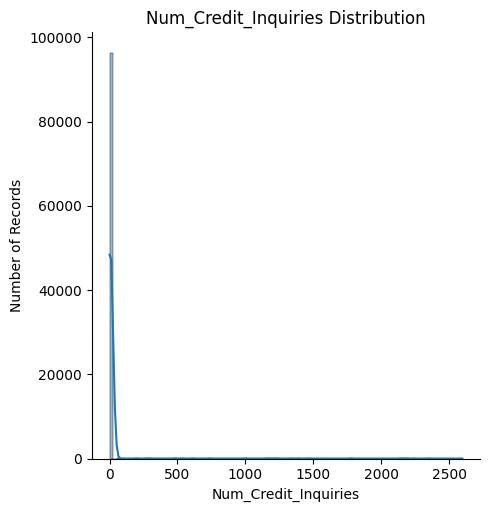

In [45]:
displot_plot(preview_dataframe, 'Num_Credit_Inquiries', bins=100)

### 09. Credit_Utilization_Ratio

In [46]:
get_column_detail(preview_dataframe, 'Credit_Utilization_Ratio')

****************************************

Details of column [Credit_Utilization_Ratio]

Data Type: float64

There is no null value

Number of Unique Values: 100000

Distribution of column: 

Credit_Utilization_Ratio
27.289440    1
33.494867    1
31.738359    1
30.625298    1
23.140640    1
            ..
31.377862    1
24.797347    1
27.262259    1
22.537593    1
23.933795    1
Name: count, Length: 100000, dtype: int64

****************************************


****************************************

Credit_Utilization_Ratio Distribution


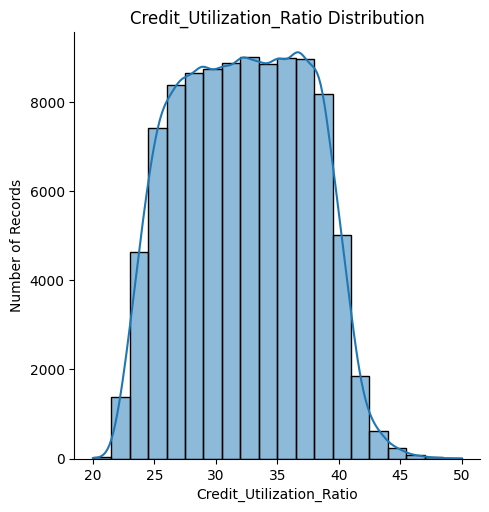

In [47]:
displot_plot(preview_dataframe, 'Credit_Utilization_Ratio')

### 10. Total_EMI_per_month

Findings:
*   outliers should be replaced

In [48]:
get_column_detail(preview_dataframe, 'Total_EMI_per_month')

****************************************

Details of column [Total_EMI_per_month]

Data Type: float64

There is no null value

Number of Unique Values: 14950

Distribution of column: 

Total_EMI_per_month
0.000000        10613
54.037058           8
30.230996           8
54.079318           8
45.341401           8
                ...  
61445.000000        1
73821.000000        1
55113.000000        1
61723.000000        1
31660.000000        1
Name: count, Length: 14950, dtype: int64

****************************************


****************************************

Total_EMI_per_month Distribution


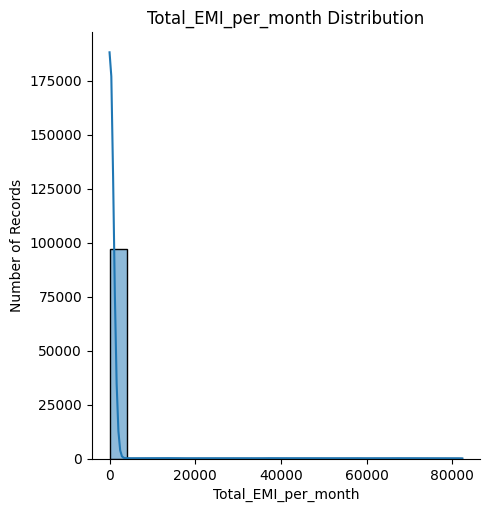

In [49]:
displot_plot(preview_dataframe, 'Total_EMI_per_month', rotation=0)

## Finding after going through each attributes in depth

1.   Need to replace outliers
2.   Need to replace strange values
3.   Need to replace null values
4.   Payment of Min amount and credit mix seems to be higly correlated to target
5.   Target Columns is Imbalanced

# 4. Data Pre-processing

## Read data from csv file

In [50]:
# Replace some error values to NaN when reading the csv
data = pd.read_csv("train.csv", na_values=['nan', '_', '_______', '#F%$D@*&8', '!@9#%8', '__10000__'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Pre-processing

In [51]:
# Function for reducing the outliers
def outlier_handling(df, median, target):
    id = df['Customer_ID']
    tar = df[target]
    if (abs(median[id] - tar) > 1):
        return median[id].astype(np.int64)
    else:
        return tar

In [52]:
# Copy the data into a new DataFrame to not corrupt the original data
df = data.copy()

# Drop the columns which are not required
df.drop(['Name'], axis=1, inplace=True)
df.drop(['SSN'], axis=1, inplace=True)

### Change the data type of the columns

In [53]:
# Remove the error values from the data
df["Age"] = df["Age"].str.replace("_","")
df["Annual_Income"] = df["Annual_Income"].str.replace("_","")
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_","")
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_","")


In [54]:
# Convert the data type of the columns to numeric
to_numeric_columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt', 'Monthly_Balance']
df[to_numeric_columns] = df[to_numeric_columns].apply(pd.to_numeric, errors='coerce')
df['Month'] = pd.to_datetime(df['Month'], format="%B").dt.month.astype(np.int64)

### Fill the missing values

In [55]:
# Fill the missing values with the mean, mode and first value matches to Customer_ID
fillna_with_mean = ['Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
fillna_with_mode = ['Occupation', 'Payment_of_Min_Amount', 'Num_of_Delayed_Payment', 'Credit_Mix']
fillna_with_first = ['Age', 'Type_of_Loan']
df[fillna_with_mean] = df[fillna_with_mean].fillna(df.groupby('Customer_ID')[fillna_with_mean].transform('mean'))
df[fillna_with_mode] = df[fillna_with_mode].fillna(df.groupby('Customer_ID')[fillna_with_mode].transform(lambda x: x.mode().iloc[0]))
df[fillna_with_first] = df[fillna_with_first].fillna(df.groupby('Customer_ID')[fillna_with_first].transform('first'))
df['Type_of_Loan'].fillna("Not Specified", inplace=True)
df['Age'] = df['Age'].astype(np.int64)

### Reduce the outliers

In [56]:
# Reduce outliers from the data, and replace them with the median
outlier_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',\
                   'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',\
                   'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',\
                    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
medians = {}
for i in range(len(outlier_columns)):
    median = df.groupby('Customer_ID')[outlier_columns[i]].median()
    df[outlier_columns[i]] = df.apply(lambda row: outlier_handling(row, median, outlier_columns[i]), axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Age                       100000 non-null  int64  
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  int64  
 11  Type_of_Loan              100000 non-null  object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  in

### Label encoding on categorical columns

In [57]:
# Getting unique values for non-numerical columns
nonNumCols = df.select_dtypes(include=['object']).columns

for col in nonNumCols:
    print(col)
    print(df[col].unique())

ID
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Occupation
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Type_of_Loan
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
Credit_Mix
['Good' 'Standard' 'Bad']
Credit_History_Age
['22 Years and 1 Months' nan '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years and 5 Months' '22 Years and 6 Months'
 '22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 9 Months' '26 Years and 10 Mont

In [58]:
categorical_cols = df[['Occupation','Payment_of_Min_Amount','Payment_Behaviour']]

# Initialize a LabelEncoder for each categorical/nominal column
# Month,
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Converting ordinal data ['Credit_Mix','Credit_Score']
customScoreMapping = {'Good': 2, 'Standard': 1, 'Poor': 0}
df['Credit_Score'] = df['Credit_Score'].map(customScoreMapping)

customMixMapping = {'Good': 2, 'Standard': 1, 'Bad': 0}
df['Credit_Mix'] = df['Credit_Mix'].map(customMixMapping)

# Converting Credit History Age into months
# Extract years and months using regular expressions
df['Years'] = df['Credit_History_Age'].str.extract('(\d+) Years', expand=False).astype(float)
df['Months'] = df['Credit_History_Age'].str.extract('(\d+) Months', expand=False).astype(float)

# Calculate the total duration in months
df['Credit_History_Age'] = df['Years'] * 12 + df['Months']
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

df.drop(['ID','Customer_ID','Type_of_Loan'], axis=1, inplace=True)
df.drop(['Years','Months'], axis=1 ,inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

Month  Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1   23          12       19114.12            1824.843333   
1      2   23          12       19114.12            1824.843333   
2      3   23          12       19114.12            1824.843333   
3      4   23          12       19114.12            1824.843333   
4      5   23          12       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3            4   
1                  3                4              3            4   
2                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   

   Delay_from_due_date  ...  Credit_Mix  Outstanding_Debt  \
0                    3  ...           2            809.98   
1                    3  ...           2            809.98   
2                    3  ...           2            809.98   
3                    3  ...           2            809.98   
4                    3  ...           2            809.98   

   Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620               265.0                      1   
1                 31.944960               266.0                      1   
2                 28.609352               267.0                      1   
3                 31.377862               268.0                      1   
4                 24.797347               269.0                      1   

   Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0            49.574949                80.415295                  2   
1            49.574949                81.000000                  3   
2            49.574949                81.699521                  4   
3            49.574949                81.000000                  5   
4            49.574949                81.000000                  1   

   Monthly_Balance  Credit_Score  
0            321.0             2  
1            321.0             2  
2            321.0             2  
3            321.0             2  
4            321.0             2  

[5 rows x 23 columns]

### Diagrams after preprocessing  (to check if all issues are resolved)

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>],
       [<Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Credit_Mix'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'To

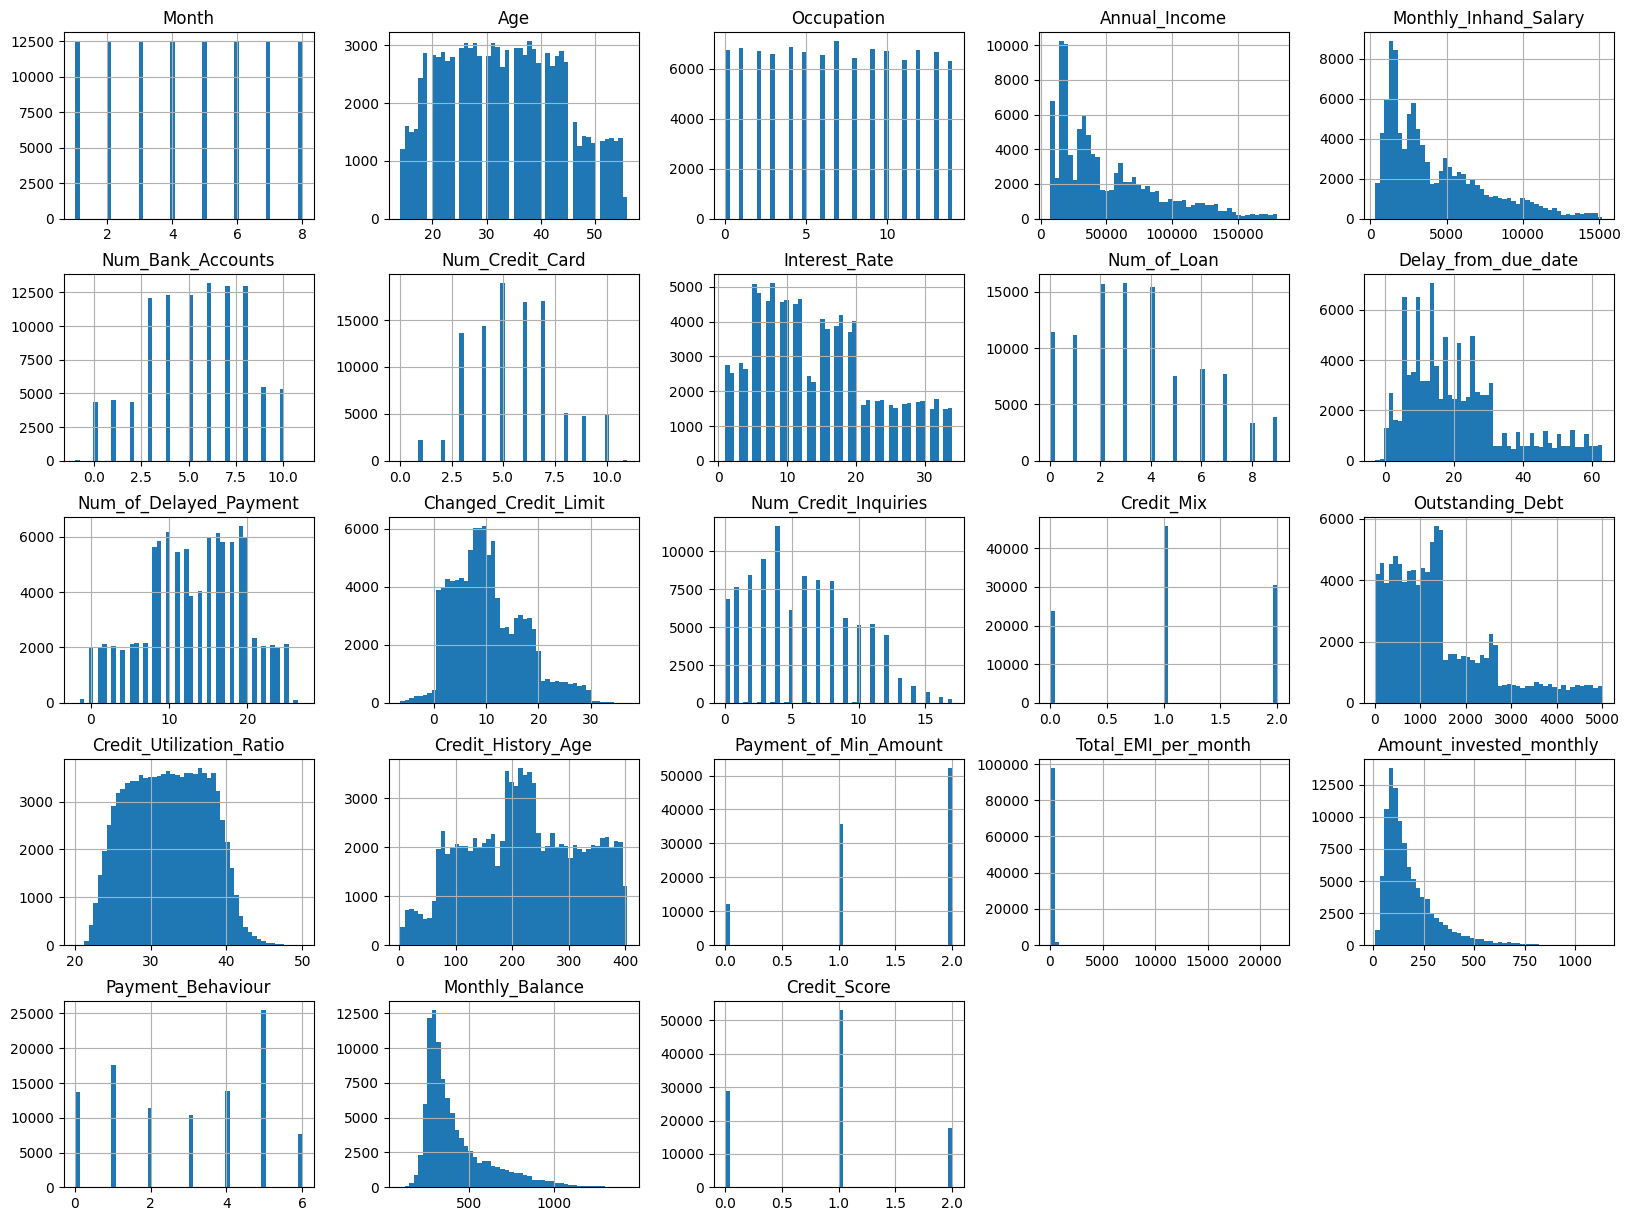

In [59]:
df.hist(bins=50, figsize=(20,15))

**Removing strange values**

Before

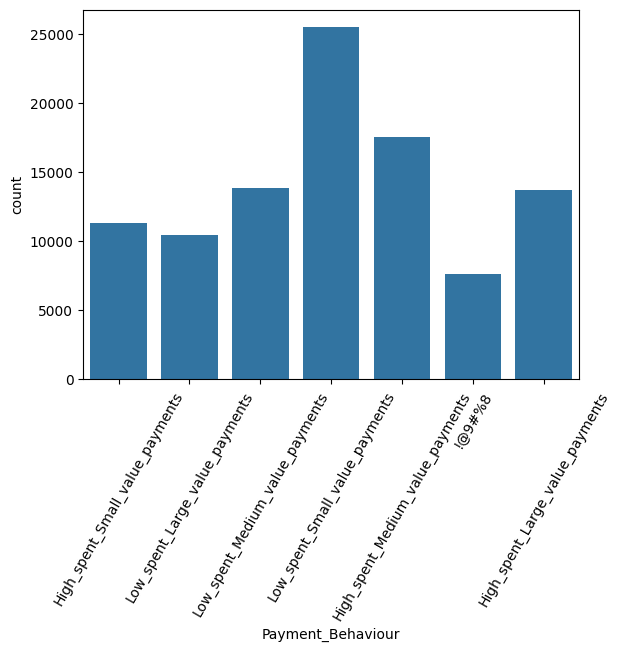

In [60]:
sns.countplot(preview_dataframe, x = 'Payment_Behaviour')
plt.xticks(rotation = 60)
plt.show()

After

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

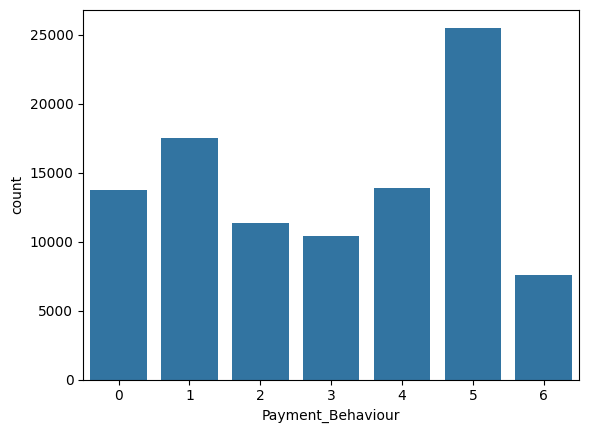

In [61]:
sns.countplot(df, x = 'Payment_Behaviour')

**handling outliers - 1**

Before

****************************************

Num_Bank_Accounts Distribution


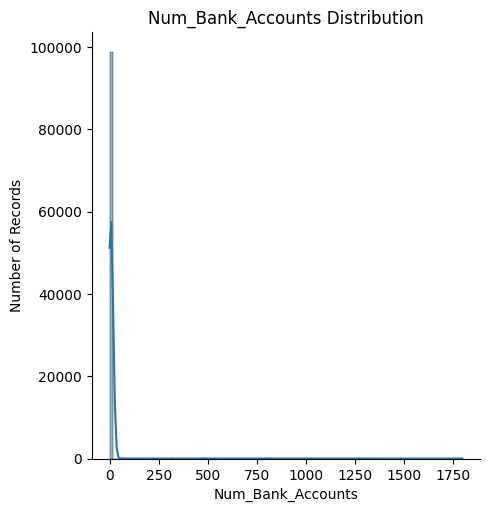

In [62]:
displot_plot(preview_dataframe, 'Num_Bank_Accounts', bins=100)

After

<Axes: xlabel='Num_Bank_Accounts', ylabel='count'>

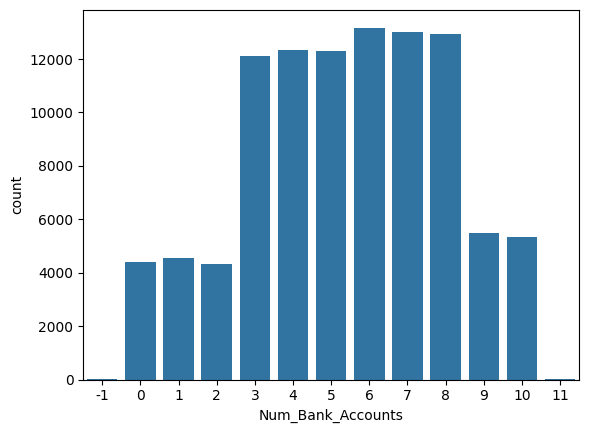

In [63]:
sns.countplot(df, x = 'Num_Bank_Accounts')

**handling outliers - 2**

Before

****************************************

Num_Credit_Card Distribution


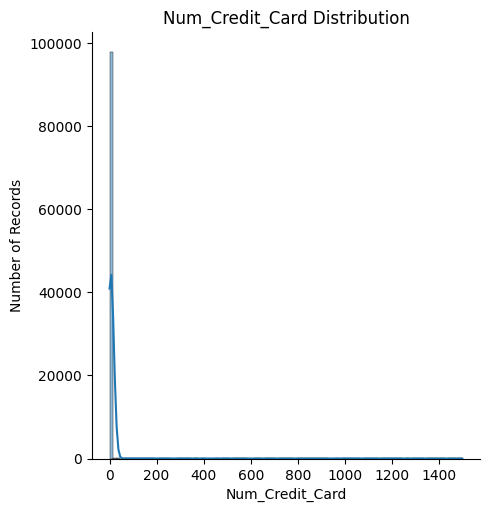

In [64]:
displot_plot(preview_dataframe, 'Num_Credit_Card', bins=100)

After

<Axes: xlabel='Num_Credit_Card', ylabel='count'>

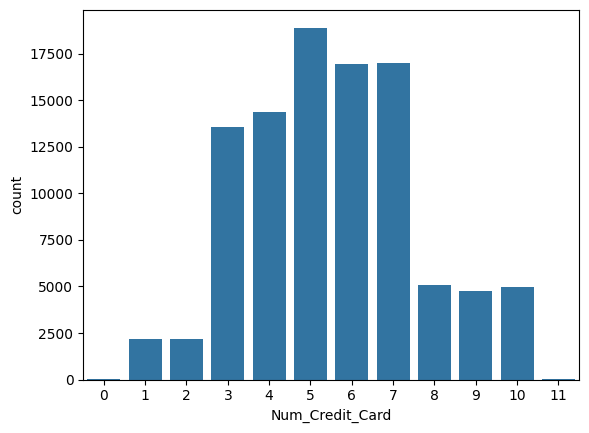

In [65]:
sns.countplot(df, x = 'Num_Credit_Card')

### Visualize the data correlation

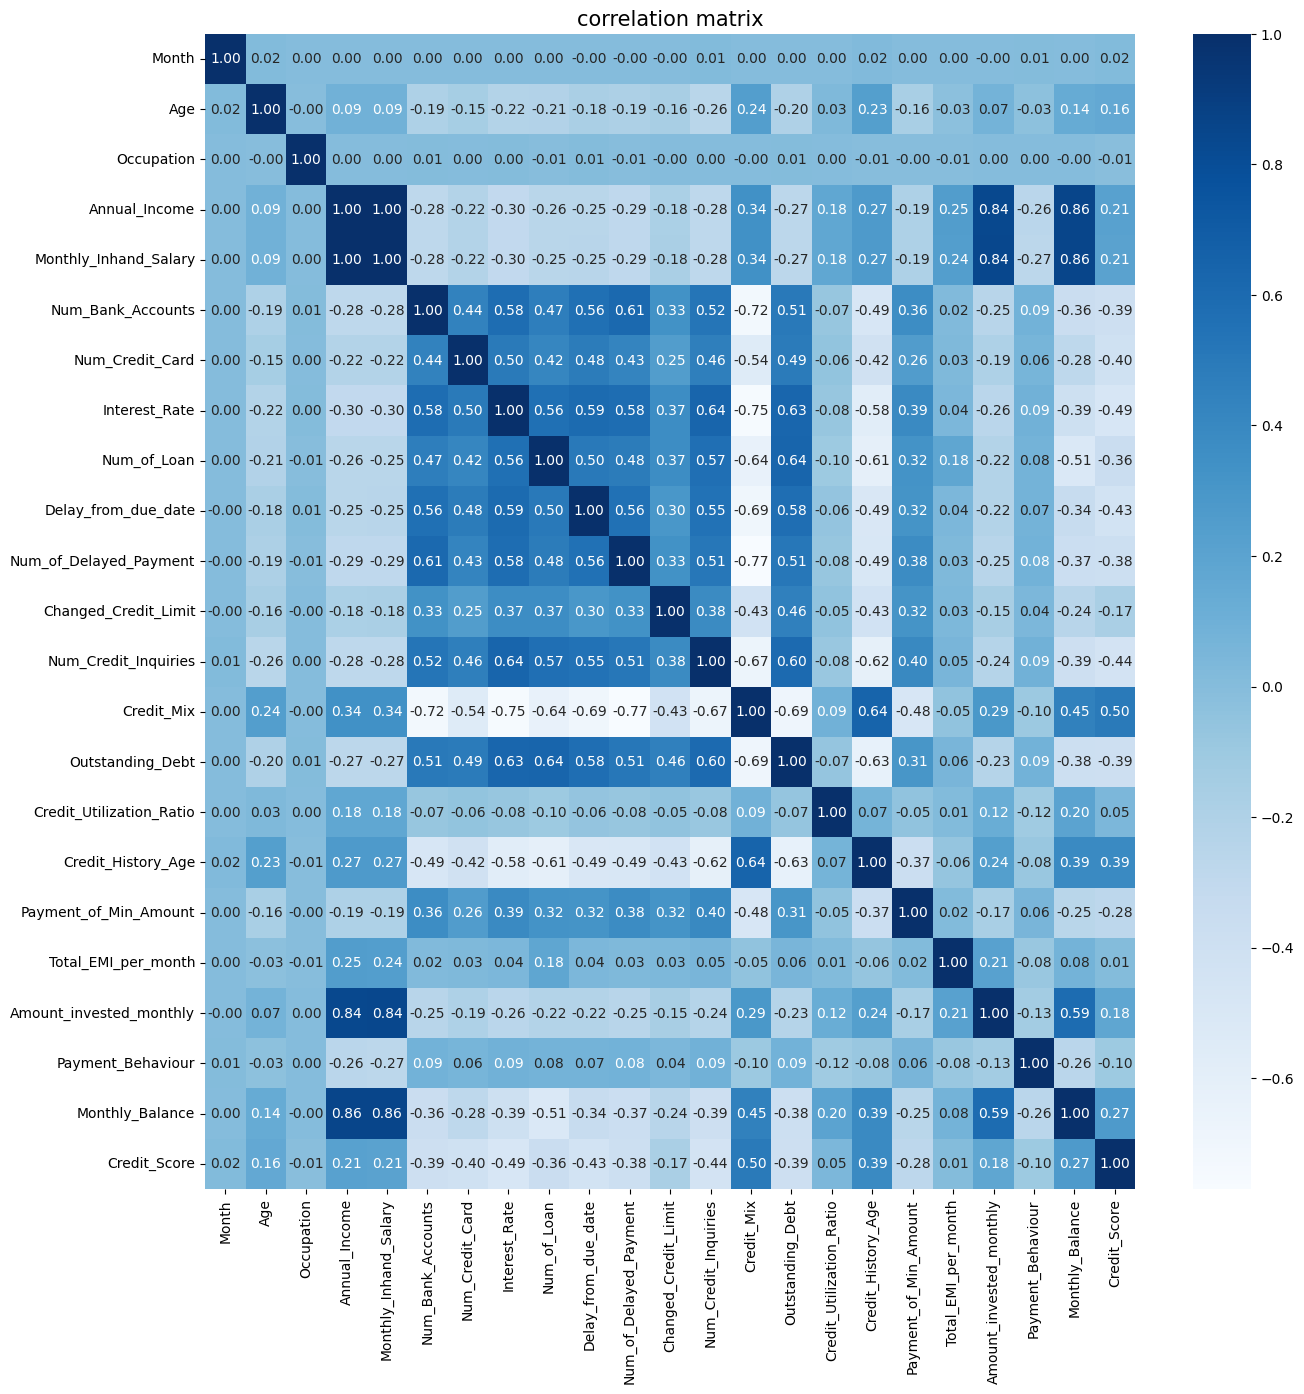

In [66]:
df_corr=df.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(15,15))
plt.title("correlation matrix",fontsize=15)
sns.heatmap(df_corr, annot=True, cmap="Blues", fmt=".2f")
plt.show()

In [67]:
# Drop the unnecessary columns (has same correlation with other columns)
df.drop('Monthly_Inhand_Salary', axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation between Credit_Score and other features\n<Before Resampling>')

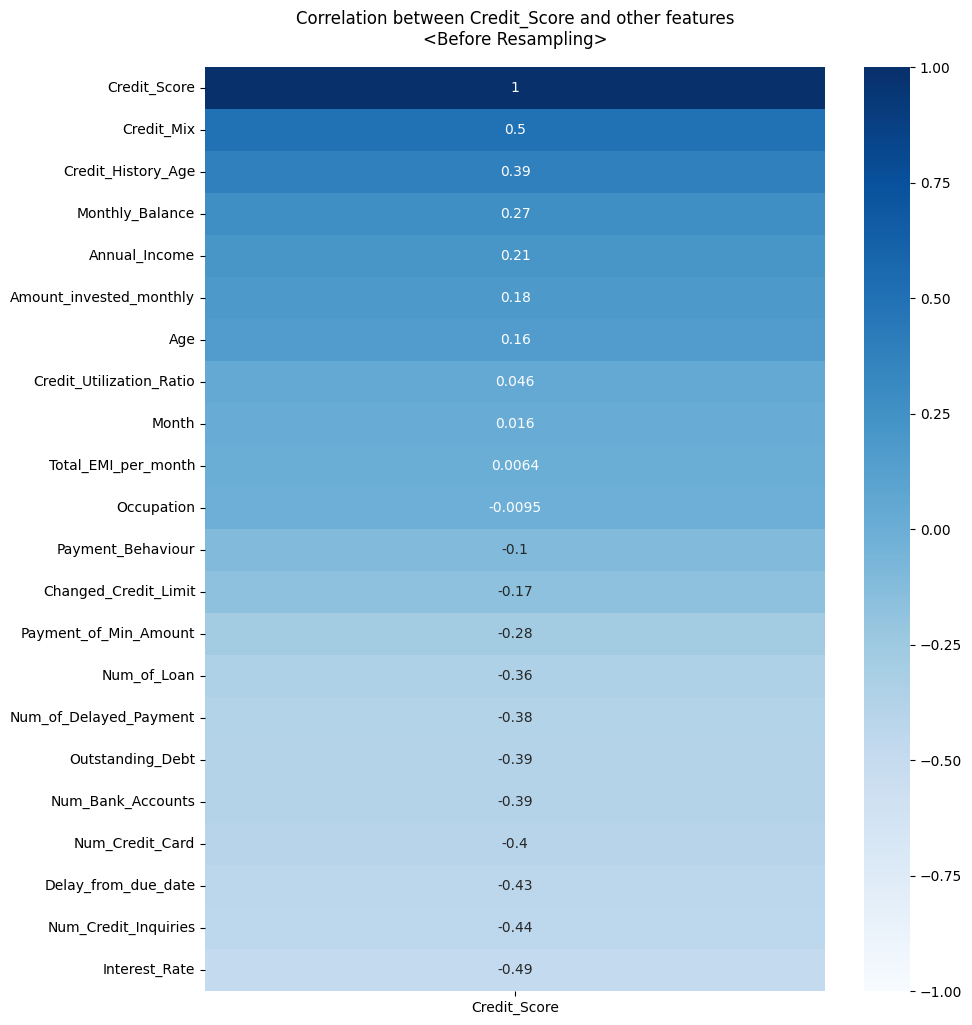

In [68]:
plt.figure(figsize=(10,12))
heatmap = sns.heatmap(df.corr()[['Credit_Score']].sort_values(by='Credit_Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation between Credit_Score and other features\n<Before Resampling>', fontdict={'fontsize':12}, pad=16)

Text(0.5, 1.0, 'Num_Credit_Inquiries  vs Credit Score')

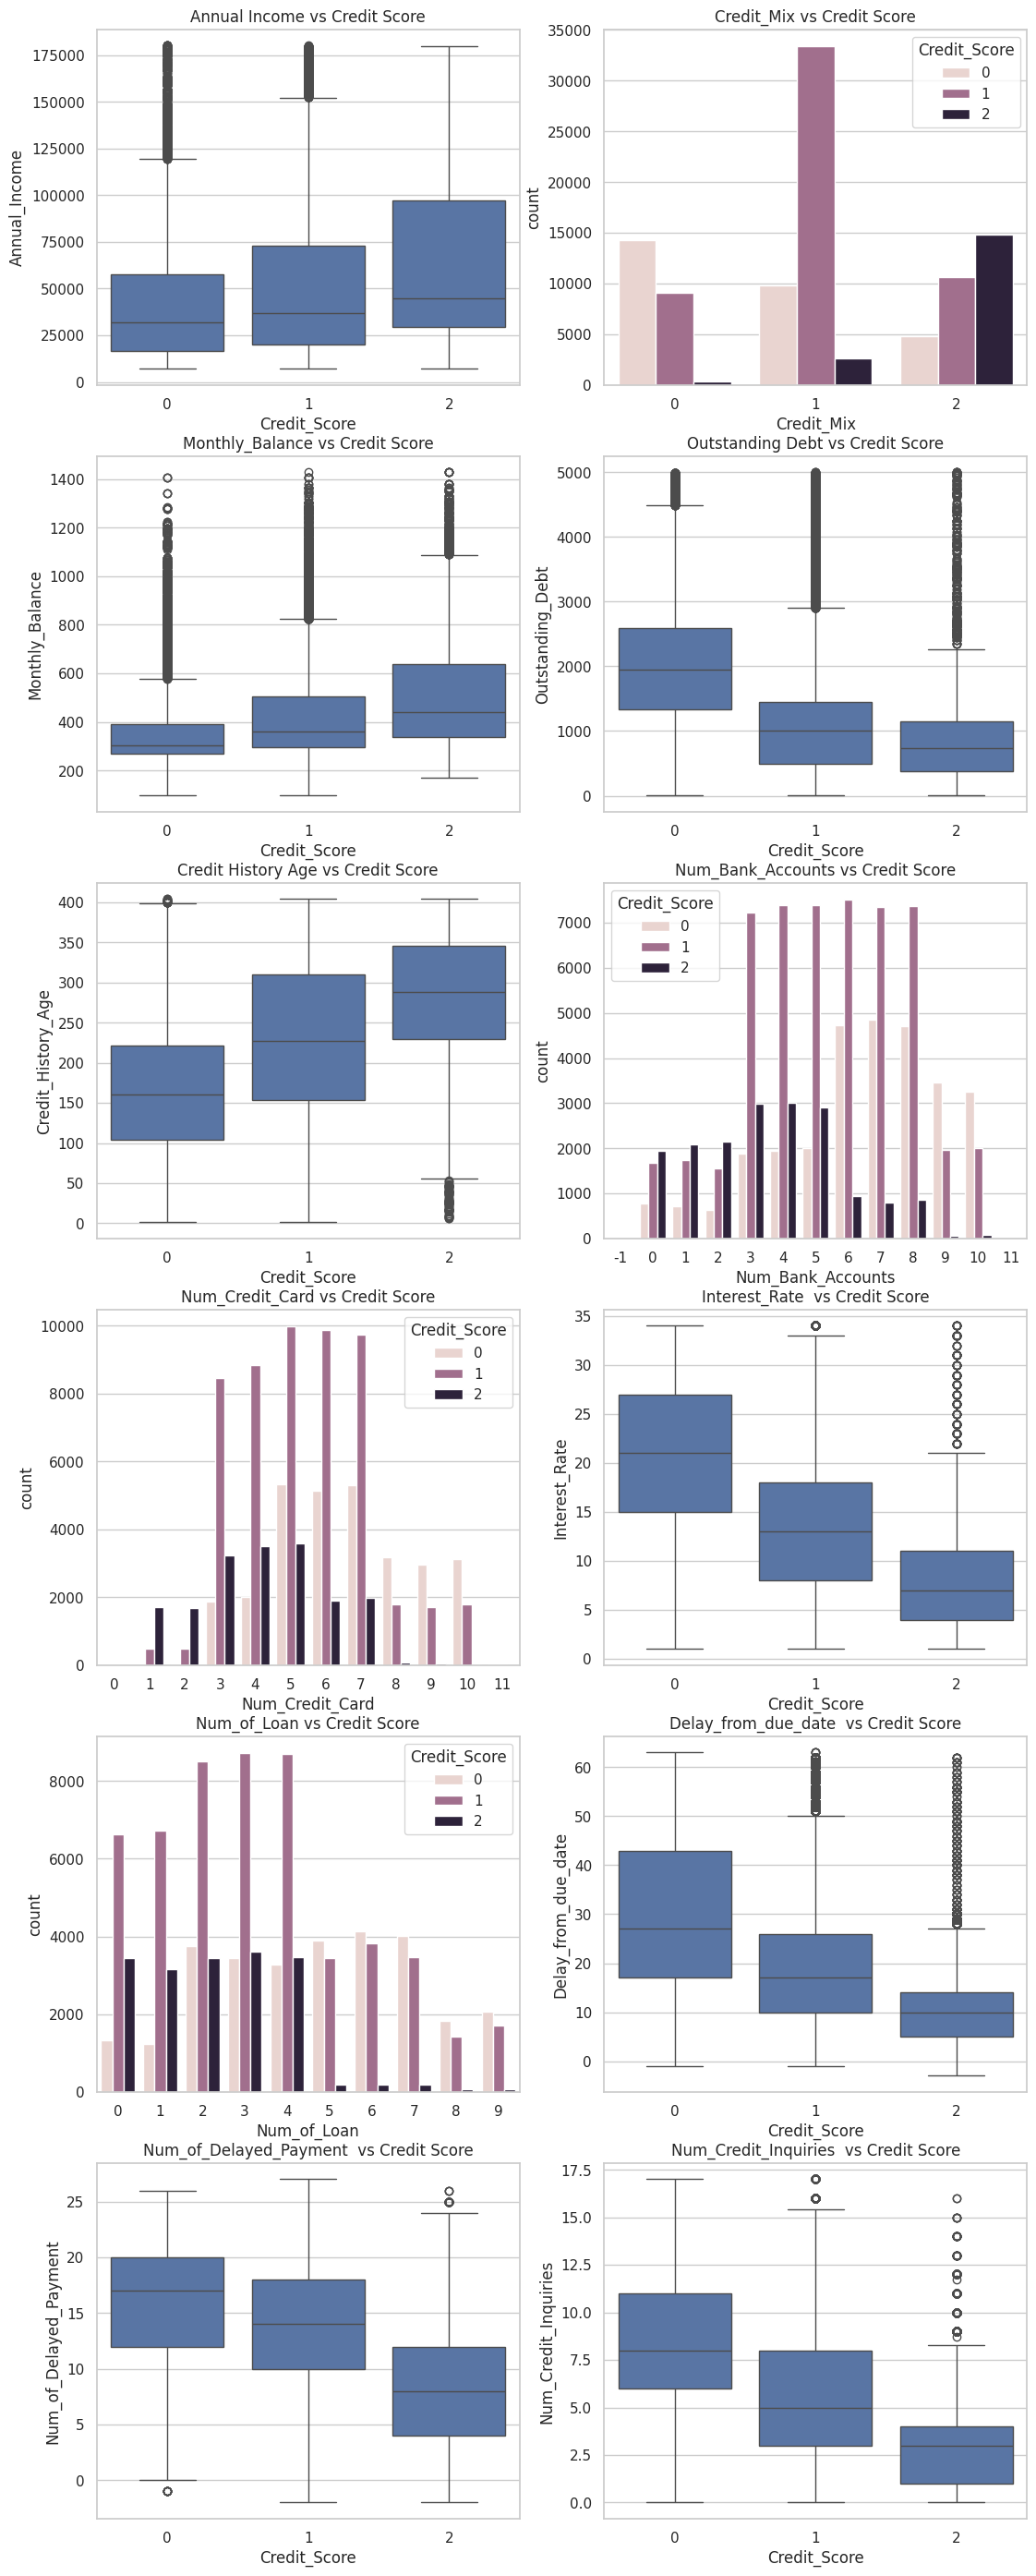

In [69]:
# Create subplots for each feature
# Set the style of the plots
sns.set(style="whitegrid")
# Create subplots for each feature
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(13, 35))

# Here we use the unencoded dataframe for clarity purposes 
# Categorical/Discrete data against credit score

sns.countplot(hue='Credit_Score', x='Num_Bank_Accounts', data=df, ax=axes[2, 1])
axes[2, 1].set_title("Num_Bank_Accounts vs Credit Score")

sns.countplot(hue='Credit_Score', x='Num_Credit_Card', data=df, ax=axes[3, 0])
axes[3, 0].set_title("Num_Credit_Card vs Credit Score")

sns.countplot(hue='Credit_Score', x='Num_of_Loan', data=df, ax=axes[4, 0])
axes[4, 0].set_title("Num_of_Loan vs Credit Score")

sns.countplot(hue='Credit_Score', x='Credit_Mix', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Credit_Mix vs Credit Score")


# Continuous data agaisnt credt score 
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Annual Income vs Credit Score")

sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Monthly_Balance vs Credit Score")

sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Outstanding Debt vs Credit Score")

sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Credit History Age vs Credit Score")

sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, ax=axes[3, 1])
axes[3, 1].set_title("Interest_Rate  vs Credit Score")

sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=axes[4, 1])
axes[4, 1].set_title("Delay_from_due_date  vs Credit Score")

sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=axes[5, 0])
axes[5, 0].set_title("Num_of_Delayed_Payment  vs Credit Score")

sns.boxplot(x='Credit_Score', y='Num_Credit_Inquiries', data=df, ax=axes[5, 1])
axes[5, 1].set_title("Num_Credit_Inquiries  vs Credit Score")

## Data Oversampling

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Create and copy the data into DataFrame X, y
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Create a new DataFrame for resampling
X_resampled = X.copy()
y_resampled = y.copy()

print("Before Resampling:  y=0:", X[y==0].shape[0], ", y=1:", X[y==1].shape[0], ", y=2:", X[y==2].shape[0])

# The data is biased to y=1. To solve the data imbalance, oversample the data.
X_sample, y_sample = resample(X[y==2], y[y==2], replace=True, n_samples=X[y==1].shape[0])
X_resampled = np.vstack((X_resampled[(y_resampled==0) | (y_resampled==1)], X_sample))
y_resampled = np.hstack((y_resampled[(y_resampled==0) | (y_resampled==1)], y_sample))

X_sample, y_sample = resample(X[y==0], y[y==0], replace=True, n_samples=X[y==1].shape[0])
X_resampled = np.vstack((X_resampled[(y_resampled==1) | (y_resampled==2)], X_sample))
y_resampled = np.hstack((y_resampled[(y_resampled==1) | (y_resampled==2)], y_sample))

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled)

# Check each class has a same size
print("After Resampling:   y=0:", X_resampled[y_resampled==0].shape[0], ", y=1:", X_resampled[y_resampled==1].shape[0], ", y=2:", X_resampled[y_resampled==2].shape[0])

Before Resampling:  y=0: 28998 , y=1: 53174 , y=2: 17828
After Resampling:   y=0: 53174 , y=1: 53174 , y=2: 53174


**So, we handled**

1.   Replace outliers   ✓
2.   Replace strange values  ✓
3.   Replace null values  ✓
4.   Target Columns is now balanced ✓

Text(0.5, 1.0, 'Correlation between Credit_Score and other features\n<After Resampling>')

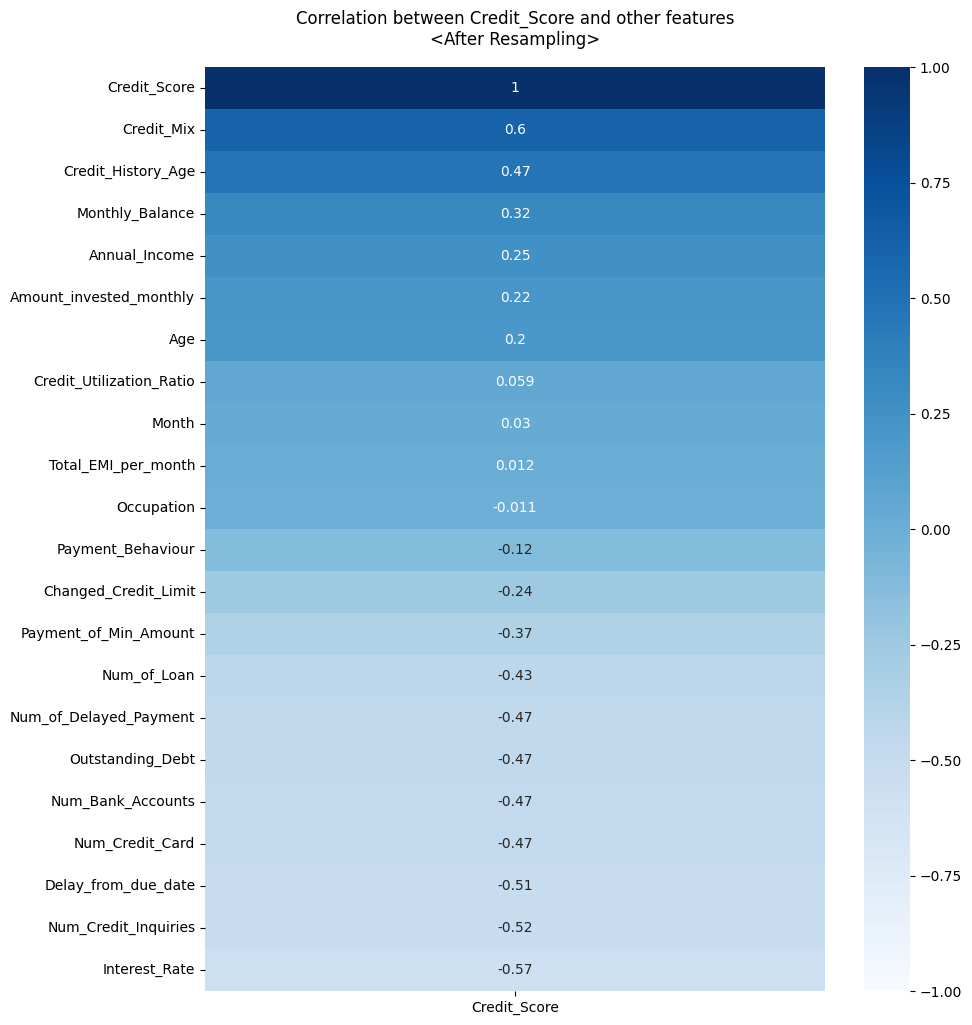

In [70]:
# Check the correlation after oversampling
df_temp = pd.DataFrame(np.vstack((X_resampled.T, y_resampled)).T, columns=df.columns)

plt.figure(figsize=(10,12))
heatmap = sns.heatmap(df_temp.corr()[['Credit_Score']].sort_values(by='Credit_Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation between Credit_Score and other features\n<After Resampling>', fontdict={'fontsize':12}, pad=16)

## User-Defined Transformer

We defined 3 features



1.   **Outstanding_Debt/Monthly_Balance** - This represents a debt ratio on monthly balance.
2.  **Late_Payment_Frequency** -  This shows how many days later this customer is than the mean overdue date
3.   **Additional_Interest_For_Month** - This represents the additional interest amount for month, by multiplying outstanding debt and interest rate


In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

# Define class for User-Defined Transformer
class UserDefinedTransformer(BaseEstimator, TransformerMixin):
    # Initialize
    def __init__(self, include=True):
        pass

    # Define a fit function
    def fit(self, X, y=None):
        return self

    # Define a transform function
    def transform(self, X, y=None):
        # Find the columns
        outstanding = np.where(X.columns == 'Outstanding_Debt')[0][0]
        balance = np.where(X.columns == 'Monthly_Balance')[0][0]
        num_of_delayed_payment = np.where(X.columns == 'Num_of_Delayed_Payment')[0][0]
        interest_rate = np.where(X.columns == 'Interest_Rate')[0][0]

        # Copy the column to prevent corruption
        transformed_df = X.copy()

        # Create three new columns
        transformed_df['Outstanding_Debt/Monthly_Balance'] = X.iloc[:,outstanding]/X.iloc[:,balance]
        transformed_df['Late_Payment_Frequency'] = X.iloc[:,num_of_delayed_payment].mean() - X.iloc[:,num_of_delayed_payment]
        transformed_df['Additional_Interest_For_Month'] = X.iloc[:,interest_rate] * X.iloc[:,outstanding]

        return transformed_df

Text(0.5, 1.0, 'Correlation between Credit_Score and other features\n<After Resampling and Applying User-Defined Transformer>')

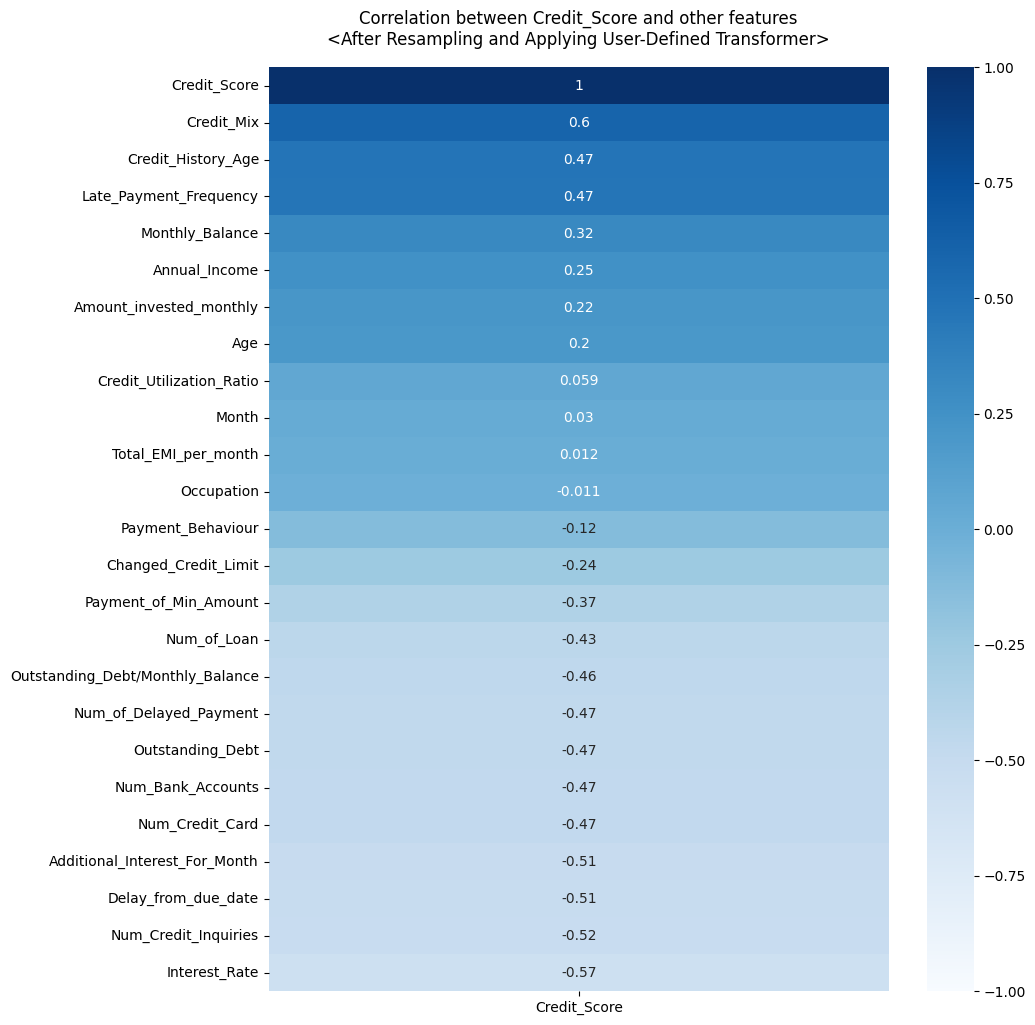

In [72]:
transformer = UserDefinedTransformer(include=True)

# Apply the transformer
X_transformed = transformer.transform(X_resampled)

transformed_columns = np.append(X_resampled.columns, ['Outstanding_Debt/Monthly_Balance', 'Late_Payment_Frequency', 'Additional_Interest_For_Month', 'Credit_Score'])
df_temp = pd.DataFrame(np.vstack((X_transformed.T, y_resampled)).T, columns=transformed_columns)

# Show the correlation after applying the transformer
plt.figure(figsize=(10,12))
heatmap = sns.heatmap(df_temp.corr()[['Credit_Score']].sort_values(by='Credit_Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation between Credit_Score and other features\n<After Resampling and Applying User-Defined Transformer>', fontdict={'fontsize':12}, pad=16)

## Split the data using Stratified Split

In [73]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Create three different train/test set for further testings

# Split the data into train and test sets <Before Resampling>
for train_index, test_index in split.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

# Split the data into train and test sets <After Resampling>
for train_index, test_index in split.split(X_resampled, y_resampled):
    X_train_resampled, y_train_resampled = X_resampled.iloc[train_index], y_resampled.iloc[train_index]
    X_test_resampled, y_test_resampled = X_resampled.iloc[test_index], y_resampled.iloc[test_index]

# Split the data into train and test sets <After Applying User Defined Transformer>
for train_index, test_index in split.split(X_transformed, y_resampled):
    X_train_transformed, y_train_transformed = X_transformed.iloc[train_index], y_resampled.iloc[train_index]
    X_test_transformed, y_test_transformed = X_transformed.iloc[test_index], y_resampled.iloc[test_index]

# Normalize the data. To avoid data leakage, fit the scaler after splitting the data
scaler = StandardScaler()
X_train_resampled_SC = scaler.fit_transform(X_train_resampled)
X_test_resampled_SC = scaler.transform(X_test_resampled)
X_train_transformed_SC = scaler.fit_transform(X_train_transformed)
X_test_transformed_SC = scaler.transform(X_test_transformed)

print("Before Resampling:  X_train:", X_train.shape, ", y_train:", y_train.shape, ", X_test:", X_test.shape, ", y_test:", y_test.shape)
print("After Resampling:   X_train:", X_train_resampled.shape, ", y_train:", y_train_resampled.shape, ", X_test:", X_test_resampled.shape, ", y_test:", y_test_resampled.shape)
print("After Transformer:  X_train:", X_train_transformed.shape, ", y_train:", y_train_transformed.shape, ", X_test:", X_test_transformed.shape, ", y_test:", y_test_transformed.shape)

Before Resampling:  X_train: (80000, 21) , y_train: (80000,) , X_test: (20000, 21) , y_test: (20000,)
After Resampling:   X_train: (127617, 21) , y_train: (127617,) , X_test: (31905, 21) , y_test: (31905,)
After Transformer:  X_train: (127617, 24) , y_train: (127617,) , X_test: (31905, 24) , y_test: (31905,)


### **Diagrams after resampling**

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>],
       [<Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Credit_Mix'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>],
       [<Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amou

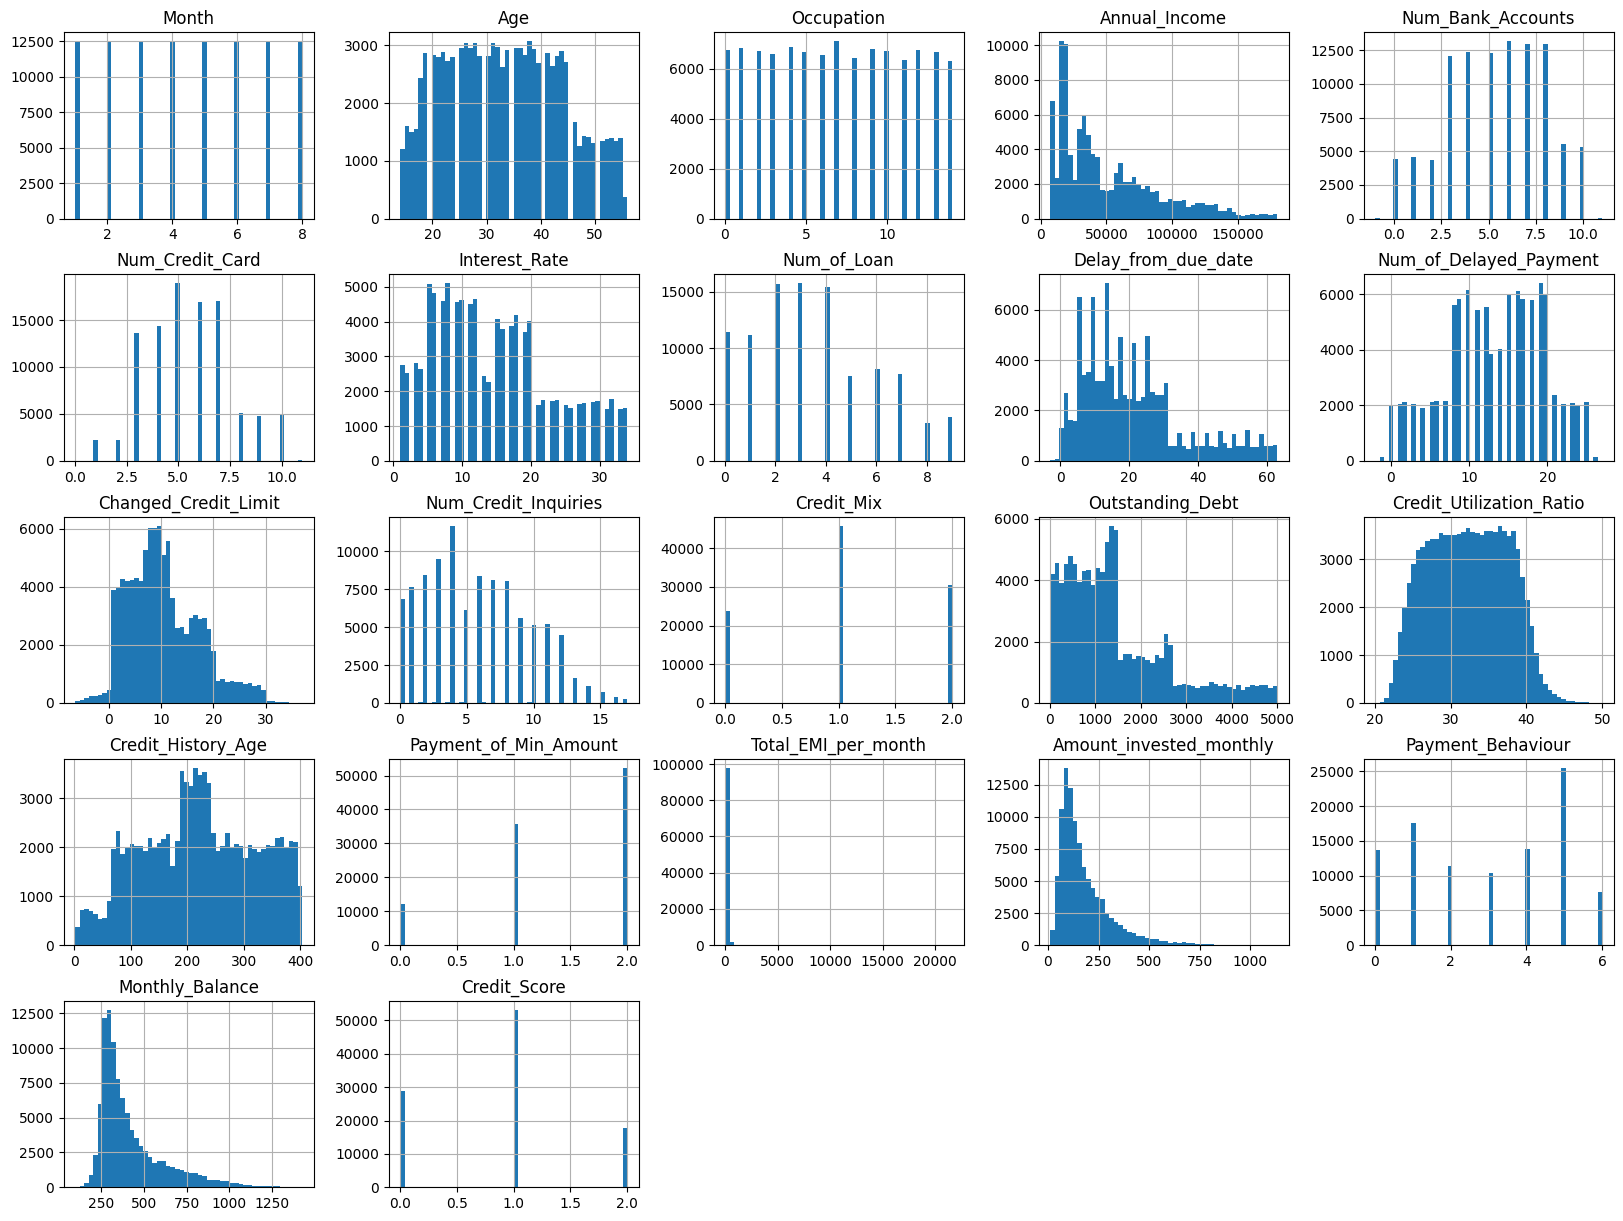

In [74]:
# Histogram before oversampling
df.hist(bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>],
       [<Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Credit_Mix'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>],
       [<Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amou

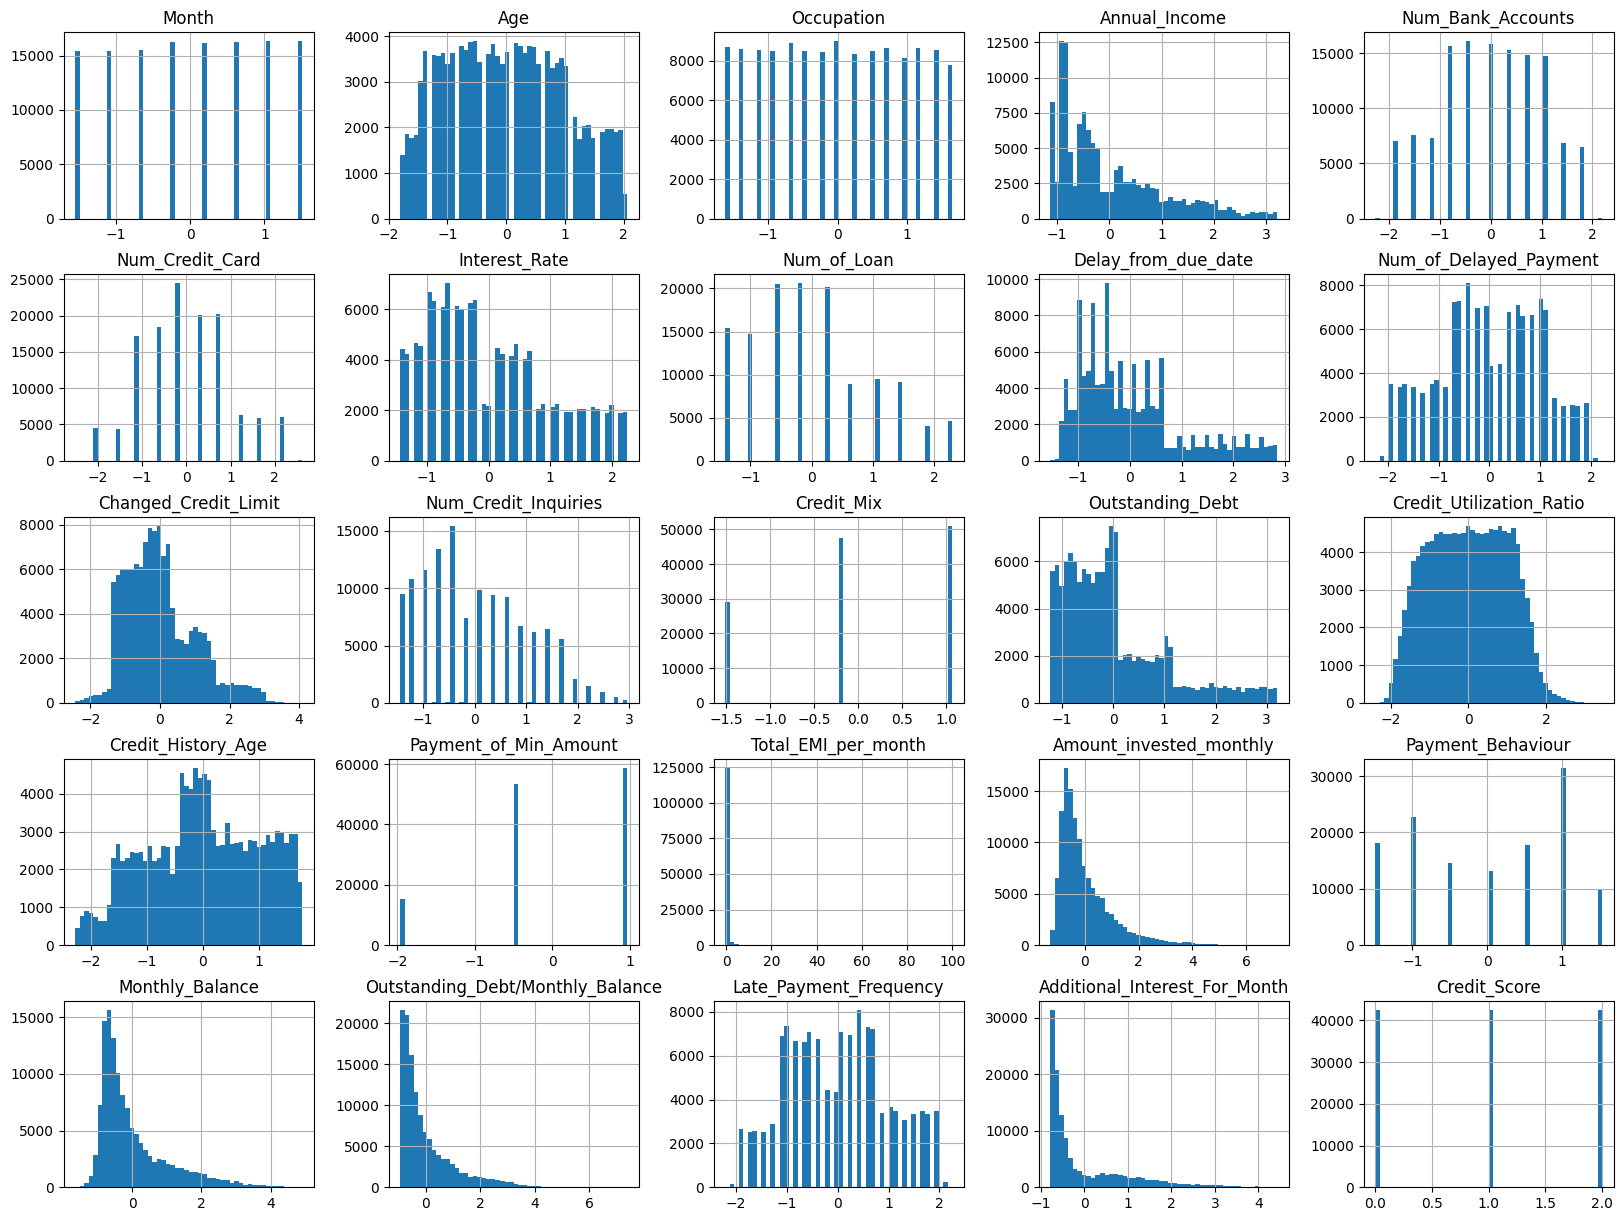

In [75]:
# After oversampling and transforming <training set>
all_columns = np.append(X_resampled.columns, ['Outstanding_Debt/Monthly_Balance', 'Late_Payment_Frequency', 'Additional_Interest_For_Month', 'Credit_Score'])
df_temp = pd.DataFrame(np.vstack((X_train_transformed_SC.T, y_train_transformed)).T, columns=all_columns)
pd.DataFrame(df_temp).hist(bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>],
       [<Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Credit_Mix'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>],
       [<Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amou

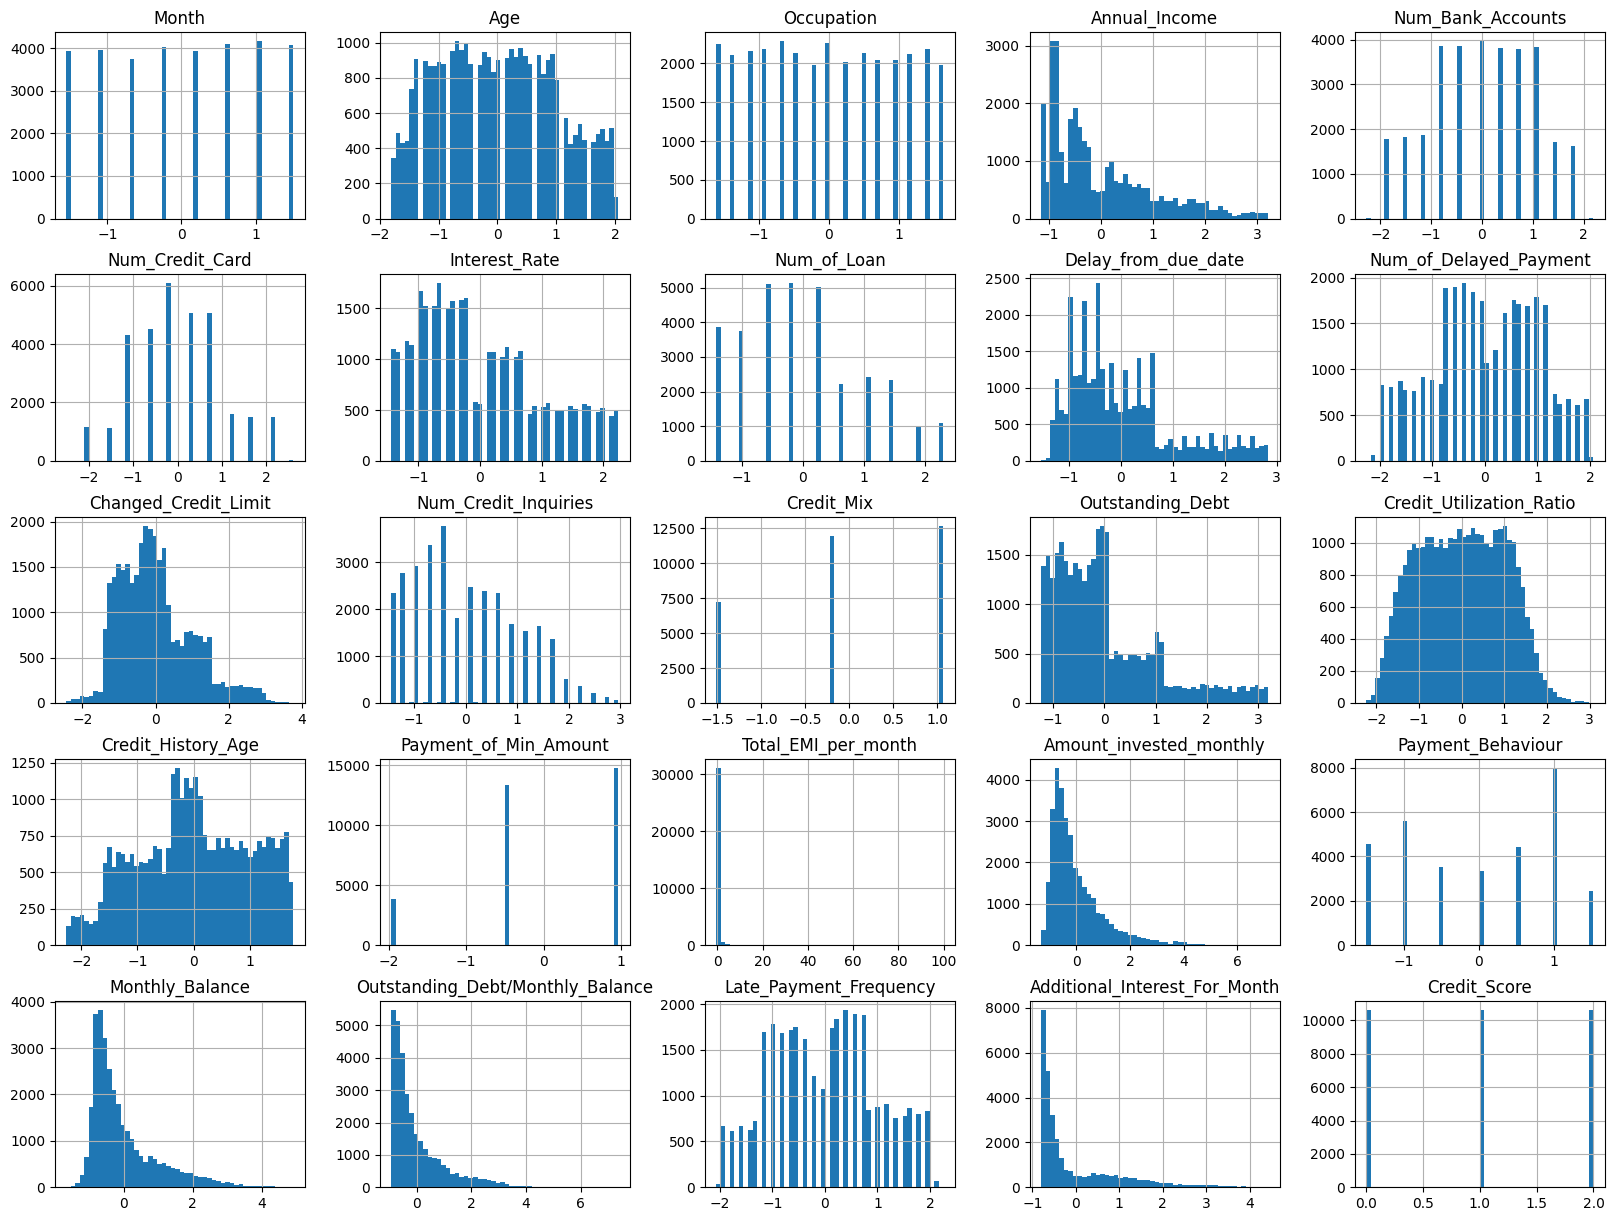

In [76]:
# After oversampling and transforming <test set>
all_columns = np.append(X_resampled.columns, ['Outstanding_Debt/Monthly_Balance', 'Late_Payment_Frequency', 'Additional_Interest_For_Month', 'Credit_Score'])
df_temp = pd.DataFrame(np.vstack((X_test_transformed_SC.T, y_test_transformed)).T, columns=all_columns)
pd.DataFrame(df_temp).hist(bins=50, figsize=(20,15))

<Axes: >

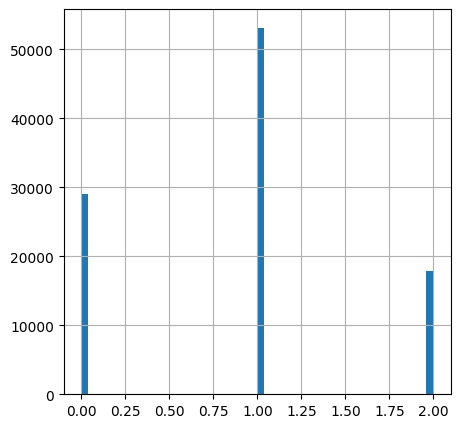

In [77]:
# Credit_Score before oversampling
df["Credit_Score"].hist(bins = 50, figsize=(5,5))

array([[<Axes: title={'center': '0'}>]], dtype=object)

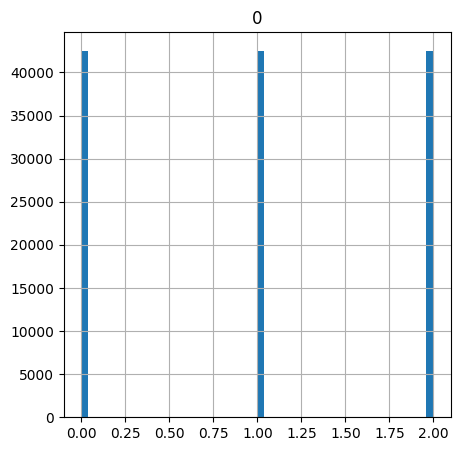

In [78]:
# Credit_Score after oversampling <training set>
pd.DataFrame(y_train_resampled).hist(bins=50, figsize=(5,5))

array([[<Axes: title={'center': '0'}>]], dtype=object)

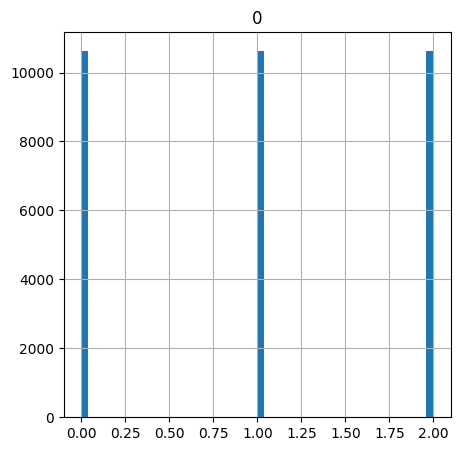

In [79]:
# Credit_Score after oversampling <test set>
pd.DataFrame(y_test_resampled).hist(bins=50, figsize=(5,5))

# 5. Implementing the different models

## Declare the helper functions

In [80]:
def model_summary(model_name, y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr')
    report = classification_report(y_true, y_pred, target_names=['Good', 'Standard', 'Poor'], output_dict=True)

    summary = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'ROC-AUC Score': [roc_auc],
        'Precision (Good)': [report['Good']['precision']],
        'Recall (Good)': [report['Good']['recall']],
        'F1-score (Good)': [report['Good']['f1-score']],
        'Precision (Standard)': [report['Standard']['precision']],
        'Recall (Standard)': [report['Standard']['recall']],
        'F1-score (Standard)': [report['Standard']['f1-score']],
        'Precision (Poor)': [report['Poor']['precision']],
        'Recall (Poor)': [report['Poor']['recall']],
        'F1-score (Poor)': [report['Poor']['f1-score']],
    })

    return summary

In [81]:
def confusion_matrix_plot(model_name, confusion_matrix):
    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",\
                xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(model_name)
    plt.show()

## Bayesian Classifier

In [82]:
df

Month  Age  Occupation  Annual_Income  Num_Bank_Accounts  \
0          1   23          12       19114.12                  3   
1          2   23          12       19114.12                  3   
2          3   23          12       19114.12                  3   
3          4   23          12       19114.12                  3   
4          5   23          12       19114.12                  3   
...      ...  ...         ...            ...                ...   
99995      4   25           9       39628.99                  4   
99996      5   25           9       39628.99                  4   
99997      6   25           9       39628.99                  4   
99998      7   25           9       39628.99                  4   
99999      8   25           9       39628.99                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4              3            4                    3   
1                    4              3            4                    3   
2                    4              3            4                    3   
3                    4              3            4                    3   
4                    4              3            4                    3   
...                ...            ...          ...                  ...   
99995                6              7            2                   21   
99996                6              7            2                   21   
99997                6              7            2                   21   
99998                6              7            2                   21   
99999                6              7            2                   21   

       Num_of_Delayed_Payment  ...  Credit_Mix  Outstanding_Debt  \
0                           5  ...           2            809.98   
1                           4  ...           2            809.98   
2                           5  ...           2            809.98   
3                           4  ...           2            809.98   
4                           4  ...           2            809.98   
...                       ...  ...         ...               ...   
99995                       7  ...           2            502.38   
99996                       7  ...           2            502.38   
99997                       6  ...           2            502.38   
99998                       6  ...           2            502.38   
99999                       6  ...           2            502.38   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                     26.822620               265.0                      1   
1                     31.944960               266.0                      1   
2                     28.609352               267.0                      1   
3                     31.377862               268.0                      1   
4                     24.797347               269.0                      1   
...                         ...                 ...                    ...   
99995                 34.663572               378.0                      1   
99996                 40.565631               379.0                      1   
99997                 41.255522               380.0                      1   
99998                 33.638208               381.0                      1   
99999                 34.192463               382.0                      1   

       Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0                49.574949                80.415295                  2   
1                49.574949                81.000000                  3   
2                49.574949                81.699521                  4   
3                49.574949                81.000000                  5   
4                49.574949                81.000000                  1   
...                    ...                      ...                ...   
99995            35.104023   

### Gaussian Naïve Bayes with basic data

              precision    recall  f1-score   support

           0       0.61      0.73      0.67      5799
           1       0.81      0.42      0.56     10635
           2       0.40      0.84      0.54      3566

    accuracy                           0.59     20000
   macro avg       0.61      0.66      0.59     20000
weighted avg       0.68      0.59      0.59     20000



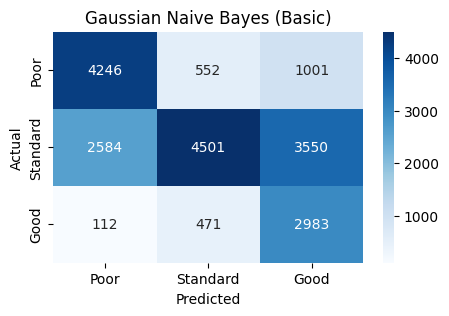

Accuracy: 0.5865


In [83]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

gnb_pred_basic = NBclassifier.predict(X_test)
gnb_pred_basic_prob = NBclassifier.predict_proba(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, gnb_pred_basic))
confusion_matrix_plot('Gaussian Naive Bayes (Basic)', confusion_matrix(y_test, gnb_pred_basic))
# Accuracy score

print('Accuracy:', accuracy_score(y_test, gnb_pred_basic))

### Gaussian Naïve Bayes with resampled data

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10635
           1       0.67      0.28      0.39     10635
           2       0.59      0.88      0.70     10635

    accuracy                           0.64     31905
   macro avg       0.65      0.64      0.61     31905
weighted avg       0.65      0.64      0.61     31905



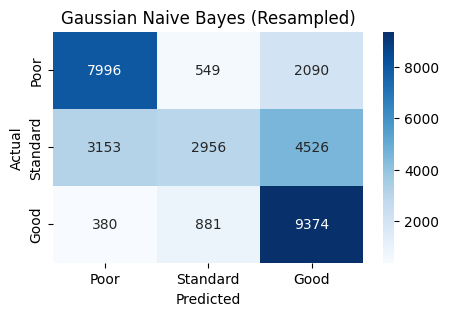

Accuracy: 0.6370788277699421


In [84]:
NBclassifier.fit(X_train_resampled, y_train_resampled)
gnb_pred_resampled = NBclassifier.predict(X_test_resampled)
gnb_pred_resampled_prob = NBclassifier.predict_proba(X_test_resampled)

# Summary of the predictions made by the classifier
print(classification_report(y_test_resampled, gnb_pred_resampled))
confusion_matrix_plot('Gaussian Naive Bayes (Resampled)', confusion_matrix(y_test_resampled, gnb_pred_resampled))
# Accuracy score
print('Accuracy:', accuracy_score(y_test_resampled, gnb_pred_resampled))

### Gaussian Naïve Bayes with resampled, normalized data

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10635
           1       0.70      0.41      0.52     10635
           2       0.63      0.86      0.73     10635

    accuracy                           0.67     31905
   macro avg       0.68      0.67      0.66     31905
weighted avg       0.68      0.67      0.66     31905



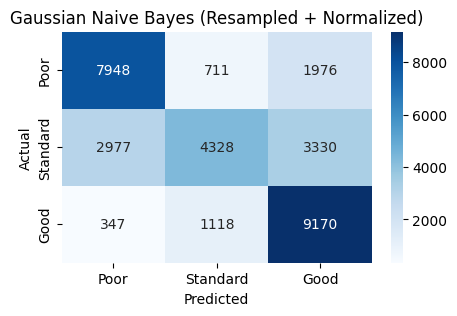

Accuracy: 0.6721830434101238


In [85]:
NBclassifier.fit(X_train_resampled_SC, y_train_resampled)
gnb_pred_resampled_SC = NBclassifier.predict(X_test_resampled_SC)
gnb_pred_resampled_SC_prob = NBclassifier.predict_proba(X_test_resampled_SC)

# Summary of the predictions made by the classifier
print(classification_report(y_test_resampled, gnb_pred_resampled_SC))
confusion_matrix_plot('Gaussian Naive Bayes (Resampled + Normalized)', confusion_matrix(y_test_resampled, gnb_pred_resampled_SC))
# Accuracy score
print('Accuracy:', accuracy_score(y_test_resampled, gnb_pred_resampled_SC))

### Hyper-parameter tuning the Naïve Bayes Classifier with Transformed Data

{'var_smoothing': 0.0003511191734215131}
              precision    recall  f1-score   support

           0       0.73      0.74      0.73     10635
           1       0.70      0.38      0.49     10635
           2       0.61      0.88      0.72     10635

    accuracy                           0.67     31905
   macro avg       0.68      0.67      0.65     31905
weighted avg       0.68      0.67      0.65     31905



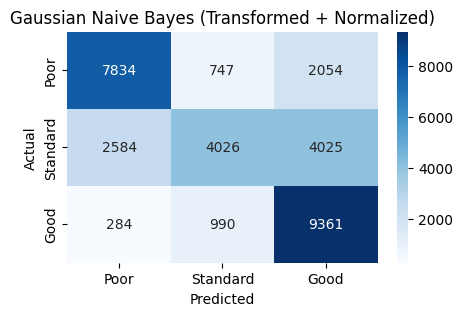

Accuracy: 0.6651308572324087


In [86]:
# Define the Gaussian Naive Bayes model
gnb = GaussianNB()

# Define the hyperparameter grid for var_smoothing
params = {'var_smoothing': np.logspace(0,-9, num=100)}

# Use GridSearchCV to find the best var_smoothing parameter
grid_search = GridSearchCV(estimator = gnb, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_transformed_SC, y_train_transformed)

# Get the best var_smoothing parameter
print(grid_search.best_params_)

#predicting
gnb_pred_transformed = grid_search.predict(X_test_transformed_SC)
gnb_pred_transformed_prob = grid_search.predict_proba(X_test_transformed_SC)

# Summary of the predictions made by the classifier
print(classification_report(y_test_transformed, gnb_pred_transformed))
confusion_matrix_plot('Gaussian Naive Bayes (Transformed + Normalized)', confusion_matrix(y_test_transformed, gnb_pred_transformed))
# Evaluate the model
accuracy = accuracy_score(y_test_transformed, gnb_pred_transformed)
print("Accuracy:", accuracy)

### Comparison of the results

In [87]:
gnb_basic_summary = model_summary('Gaussian Naive Bayes (Basic)', y_test, gnb_pred_basic, gnb_pred_basic_prob)
gnb_resampled_summary = model_summary('Gaussian Naive Bayes (Resampled)', y_test_resampled, gnb_pred_resampled, gnb_pred_resampled_prob)
gnb_resampled_SC_summary = model_summary('Gaussian Naive Bayes (Resampled + Normalized)', y_test_resampled, gnb_pred_resampled_SC, gnb_pred_resampled_SC_prob)
gnb_transformed_SC_summary = model_summary('Gaussian Naive Bayes (Transformed + Normalized)', y_test_transformed, gnb_pred_transformed, gnb_pred_transformed_prob)

gnb_summary = pd.concat([gnb_basic_summary, gnb_resampled_summary, gnb_resampled_SC_summary, gnb_transformed_SC_summary])
gnb_summary

Model  Accuracy  ROC-AUC Score  \
0                     Gaussian Naive Bayes (Basic)  0.586500       0.767024   
0                 Gaussian Naive Bayes (Resampled)  0.637079       0.784156   
0    Gaussian Naive Bayes (Resampled + Normalized)  0.672183       0.794185   
0  Gaussian Naive Bayes (Transformed + Normalized)  0.665131       0.790039   

   Precision (Good)  Recall (Good)  F1-score (Good)  Precision (Standard)  \
0          0.611639       0.732195         0.666510              0.814808   
0          0.693555       0.751857         0.721530              0.673963   
0          0.705110       0.747344         0.725613              0.702940   
0          0.732013       0.736624         0.734311              0.698594   

   Recall (Standard)  F1-score (Standard)  Precision (Poor)  Recall (Poor)  \
0           0.423225             0.557089          0.395938       0.836511   
0           0.277950             0.393582          0.586241       0.881429   
0           0.406958             0.515484          0.633462       0.862247   
0           0.378561             0.491035          0.606282       0.880207   

   F1-score (Poor)  
0         0.537477  
0         0.704150  
0         0.730357  
0         0.718006

## Artificial Neural Networks (ANN)

### ANN with basic data

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      5799
           1       0.61      0.81      0.70     10635
           2       0.50      0.09      0.16      3566

    accuracy                           0.62     20000
   macro avg       0.59      0.50      0.50     20000
weighted avg       0.61      0.62      0.58     20000



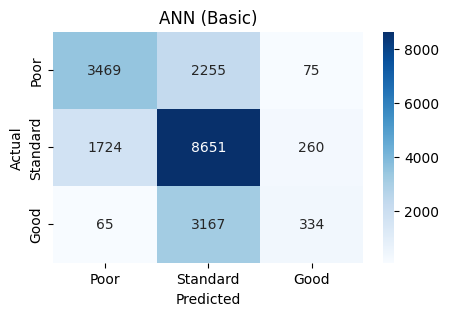

Accuracy: 0.6227


In [88]:
from sklearn.neural_network import MLPClassifier

# Define the MLPClassifier with some basic parameters
mlp = MLPClassifier(hidden_layer_sizes=(256,128,128,64), max_iter=500, activation='relu',\
                    solver='adam', random_state=57, early_stopping=True, verbose=False,\
                    validation_fraction=0.1)

# Fit the basic training set
mlp.fit(X_train, y_train)

# Accuracy
ann_pred_basic = mlp.predict(X_test)
ann_pred_basic_prob = mlp.predict_proba(X_test)
print(classification_report(y_test, ann_pred_basic, zero_division=0))
confusion_matrix_plot('ANN (Basic)', confusion_matrix(y_test, ann_pred_basic))
accuracy = mlp.score(X_test, y_test)
print("Accuracy:", accuracy)

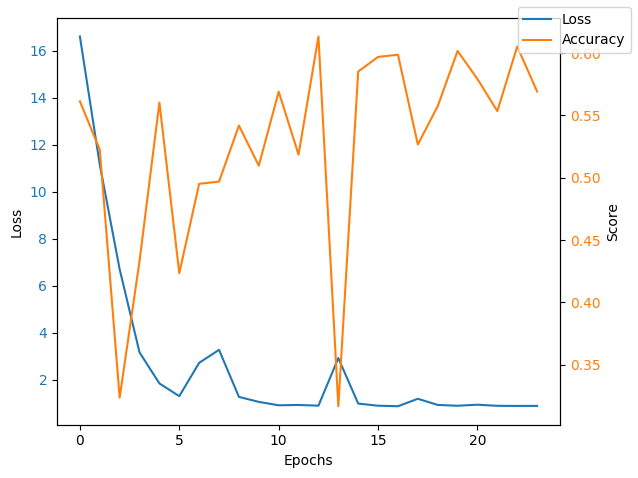

In [89]:
# Show loss and accuracy graph
def show_loss_graph(model):
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.plot(model.loss_curve_, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    color = 'tab:orange'
    ax2 = ax1.twinx()
    ax2.set_ylabel('Score')
    ax2.plot(model.validation_scores_, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    fig.legend(['Loss', 'Accuracy'], loc='upper right')
    fig.show()

show_loss_graph(mlp)

### ANN with resampled data

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10635
           1       0.49      0.42      0.45     10635
           2       0.60      0.66      0.63     10635

    accuracy                           0.61     31905
   macro avg       0.60      0.61      0.60     31905
weighted avg       0.60      0.61      0.60     31905



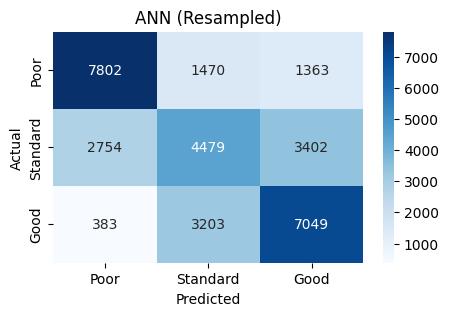

Accuracy: 0.6058611502899232


In [90]:
# Fit the resampled data
mlp.fit(X_train_resampled, y_train_resampled)

# Accuracy
ann_pred_resampled = mlp.predict(X_test_resampled)
ann_pred_resampled_prob = mlp.predict_proba(X_test_resampled)
print(classification_report(y_test_resampled, ann_pred_resampled, zero_division=0))
confusion_matrix_plot('ANN (Resampled)', confusion_matrix(y_test_resampled, ann_pred_resampled))
accuracy = mlp.score(X_test_resampled, y_test_resampled)
print("Accuracy:", accuracy)

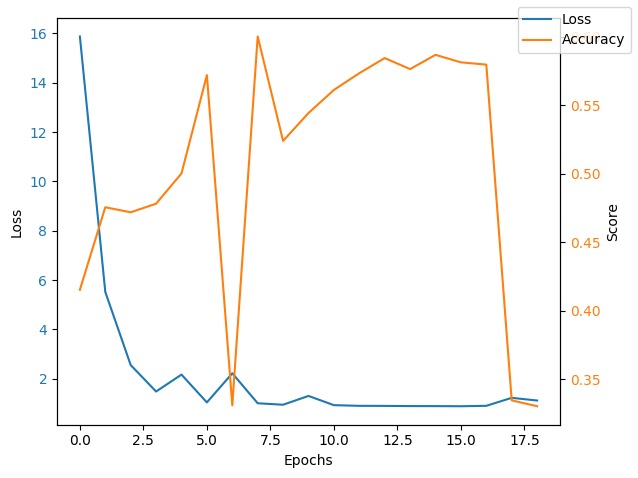

In [91]:
show_loss_graph(mlp)

> Faces **Exploding gradient problem**.
>
>This can happen when the data is not in the same range. When some of the data has extrimely higher values then the others, the loss function may did not work properly.
>To solve this, we need to normalize the data.

### ANN with resampled, normalized data

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     10635
           1       0.89      0.76      0.82     10635
           2       0.91      0.96      0.93     10635

    accuracy                           0.89     31905
   macro avg       0.89      0.89      0.88     31905
weighted avg       0.89      0.89      0.88     31905



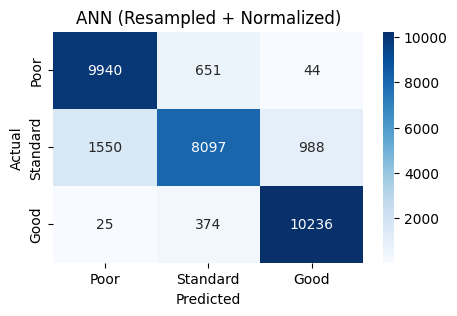

Accuracy: 0.886162043566839


In [92]:
# Fit the resampled, normalized data
mlp.fit(X_train_resampled_SC, y_train_resampled)
# Accuracy
ann_pred_resampled_SC = mlp.predict(X_test_resampled_SC)
ann_pred_resampled_SC_prob = mlp.predict_proba(X_test_resampled_SC)
print(classification_report(y_test_resampled, ann_pred_resampled_SC, zero_division=0))
confusion_matrix_plot('ANN (Resampled + Normalized)', confusion_matrix(y_test_resampled, ann_pred_resampled_SC))
accuracy = mlp.score(X_test_resampled_SC, y_test_resampled)
print("Accuracy:", accuracy)

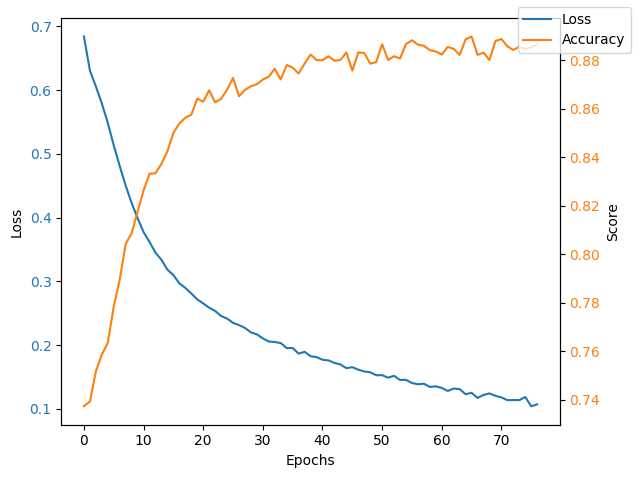

In [93]:
show_loss_graph(mlp)

### Hyper-parameter tuning the ANN with Transformed Data

In [94]:
# Check the current parameters
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (256, 128, 128, 64),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 57,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[CV] END activation=relu, hidden_layer_sizes=(256, 128, 128, 64), learning_rate_init=0.01, warm_start=True; total time= 1.3min
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 128, 64), learning_rate_init=0.01, warm_start=True; total time= 2.3min
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 128, 64), learning_rate_init=0.01, warm_start=True; total time= 2.9min
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 128, 64), learning_rate_init=0.001, warm_start=True; total time= 1.4min
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 128, 64), learning_rate_init=0.001, warm_start=True; total time= 1.2min
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 128, 64), learning_rate_init=0.001, warm_start=True; total time= 1.7min
[CV] END activation=relu, hidden_layer_sizes=(128, 128, 64, 64), learning_rate_init=0.01, warm_start=True; total time= 2.2min
[CV] END activation=relu, hidden_layer_sizes=(128, 128, 64, 64), learning_rate_init=0.01, warm_start=True; to

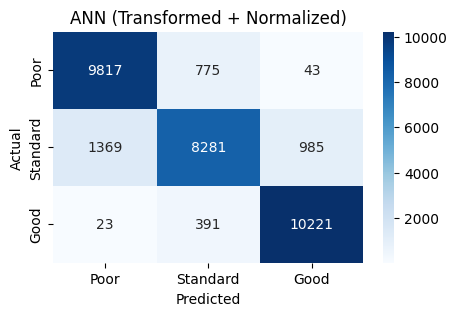

Accuracy: 0.8876038238520608
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(256, 128, 128, 64), max_iter=500,
              random_state=57, warm_start=True)
{'activation': 'tanh', 'hidden_layer_sizes': (256, 128, 128, 64), 'learning_rate_init': 0.001, 'warm_start': True}


In [95]:
# Add some parameters to perform Grid Search
param_distribs = {
    "warm_start": [True],
    "hidden_layer_sizes": [(256,128,128,64), (128, 128, 64, 64), (256, 128, 64, 32), (128, 64, 32), (256, 256, 128, 64)],
    "activation": ["relu", "tanh"],
    "learning_rate_init": [1e-2, 1e-3]
}

# Initialize the GridSearchCV with 3 folds
rnd_search_cv = GridSearchCV(mlp, param_distribs, cv=3, verbose=2)

# Fit transformed set
rnd_search_cv.fit(X_train_transformed_SC, y_train_transformed)

# Accuracy
ann_pred_transformed = rnd_search_cv.best_estimator_.predict(X_test_transformed_SC)
ann_pred_transformed_prob = rnd_search_cv.best_estimator_.predict_proba(X_test_transformed_SC)
print(classification_report(y_test_transformed, ann_pred_transformed, zero_division=0))
confusion_matrix_plot('ANN (Transformed + Normalized)', confusion_matrix(y_test_transformed, ann_pred_transformed))
accuracy = rnd_search_cv.score(X_test_transformed_SC, y_test_transformed)
print("Accuracy:", accuracy)

# Check the best estimator and its parameters
print(rnd_search_cv.best_estimator_)
print(rnd_search_cv.best_params_)

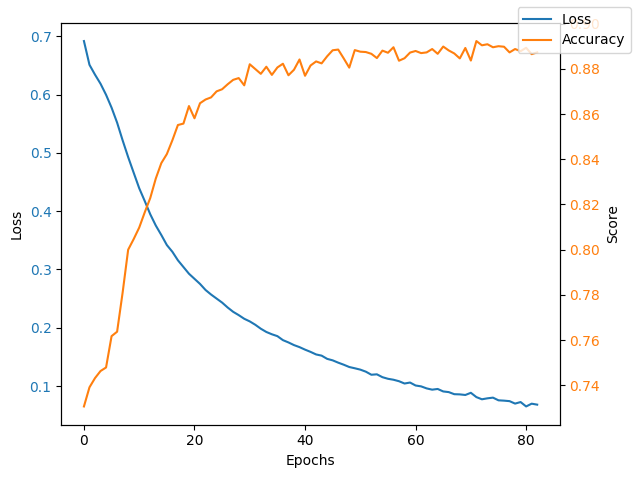

In [96]:
# Show loss graph
show_loss_graph(rnd_search_cv.best_estimator_)

### Comparison of the results

In [97]:
ann_basic_summary = model_summary('ANN (Basic)', y_test, ann_pred_basic, ann_pred_basic_prob)
ann_resampled_summary = model_summary('ANN (Resampled)', y_test_resampled, ann_pred_resampled, ann_pred_resampled_prob)
ann_resampled_SC_summary = model_summary('ANN (Resampled + Normalized)', y_test_resampled, ann_pred_resampled_SC, ann_pred_resampled_SC_prob)
ann_transformed_SC_summary = model_summary('ANN (Transformed + Normalized)', y_test_transformed, ann_pred_transformed, ann_pred_transformed_prob)

ann_summary = pd.concat([ann_basic_summary, ann_resampled_summary, ann_resampled_SC_summary, ann_transformed_SC_summary])
ann_summary

Model  Accuracy  ROC-AUC Score  Precision (Good)  \
0                     ANN (Basic)  0.622700       0.773137          0.659757   
0                 ANN (Resampled)  0.605861       0.745290          0.713228   
0    ANN (Resampled + Normalized)  0.886162       0.948996          0.863222   
0  ANN (Transformed + Normalized)  0.887604       0.952555          0.875814   

   Recall (Good)  F1-score (Good)  Precision (Standard)  Recall (Standard)  \
0       0.598207         0.627476              0.614723           0.813446   
0       0.733615         0.723278              0.489401           0.421157   
0       0.934650         0.897517              0.887634           0.761354   
0       0.923084         0.898828              0.876575           0.778655   

   F1-score (Standard)  Precision (Poor)  Recall (Poor)  F1-score (Poor)  
0             0.700259          0.499253       0.093662         0.157733  
0             0.452721          0.596665       0.662811         0.628001  
0             0.819659          0.908413       0.962482         0.934666  
0             0.824719          0.908614       0.961072         0.934107

>Normalization is a significant factor in ANN. It can improve the accuracy of the model.
>
>The ROC-AUC score of the model with normalizad data is above 0.94, which is higher than the model without normalization.
>This means that the model with normalized data is more accurate(less random) than the model without normalization.

## k-Nearest Neighbors (kNN)

### Default kNN with basic data

Odd number will be selected for value "k" to avoid ties in classification.

https://www.ibm.com/topics/knn#:~:text=The%20choice%20of%20k%20will,optimal%20k%20for%20your%20dataset.

Accuracy: 0.8043
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      5799
           1       0.84      0.79      0.81     10635
           2       0.76      0.79      0.77      3566

    accuracy                           0.80     20000
   macro avg       0.79      0.81      0.80     20000
weighted avg       0.81      0.80      0.80     20000



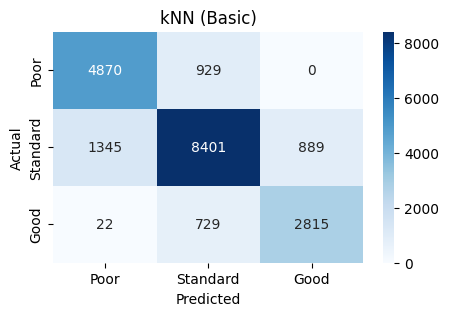

In [98]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train a classification model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
knn_pred_basic = knn_model.predict(X_test)
knn_pred_basic_prob = knn_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_pred_basic)
print(f"Accuracy: {accuracy}")

classification_report_result = classification_report(y_test, knn_pred_basic)
print("Classification Report:\n",
      classification_report_result)
confusion_matrix_plot('kNN (Basic)', confusion_matrix(y_test, knn_pred_basic))

### Evaluation with Cross-Validation

In [99]:
from sklearn.model_selection import cross_val_score, KFold

# Choose k-fold cross-validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(knn_model, X_train,
                         y_train, scoring='accuracy', cv=kfold)

# Evaluate results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.7739375 0.7796875 0.7825    0.776875  0.781    ]
Mean Accuracy: 0.7788



### kNN Model with Resampling and Normalization

In [100]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features using MinMaxScaler
minMaxscaler = MinMaxScaler()

X_train_minMaxNormalized = minMaxscaler.fit_transform(X_train_resampled)
X_test_minMaxNormalized = minMaxscaler.fit_transform(X_test_resampled)

#### kNN Model with different Normalization Method

##### kNN with resampled, min-max scaled data

Accuracy: 0.8037611659614481
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83     10635
           1       0.82      0.62      0.71     10635
           2       0.81      0.92      0.86     10635

    accuracy                           0.80     31905
   macro avg       0.80      0.80      0.80     31905
weighted avg       0.80      0.80      0.80     31905



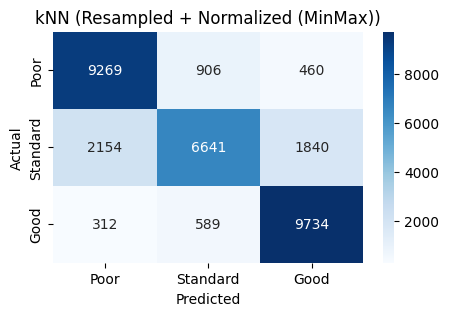

In [101]:
# Create and train a classification model using MinMaxScaler
minMax_knn_model = KNeighborsClassifier(n_neighbors=5)
minMax_knn_model.fit(X_train_minMaxNormalized, y_train_resampled)

# Make predictions on the testing set
knn_pred_resampled_MM = minMax_knn_model.predict(X_test_minMaxNormalized)
knn_pred_resampled_MM_prob = minMax_knn_model.predict_proba(X_test_minMaxNormalized)

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, knn_pred_resampled_MM)
print(f"Accuracy: {accuracy}")

classification_report_result = classification_report(y_test_resampled, knn_pred_resampled_MM)
print("Classification Report:\n",
      classification_report_result)
confusion_matrix_plot('kNN (Resampled + Normalized (MinMax))', confusion_matrix(y_test_resampled, knn_pred_resampled_MM))

In [102]:
# Using model whose data that was normalized using MinMaxScale

# Choose k-fold cross-validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(minMax_knn_model, X_train_minMaxNormalized,
                         y_train_resampled, scoring='accuracy', cv=kfold)

# Evaluate results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.78443818 0.78455571 0.78721153 0.78678055 0.78431219]
Mean Accuracy: 0.7854596325362372


##### kNN with resampled, normalized data

Accuracy: 0.8216893903776837
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85     10635
           1       0.83      0.64      0.72     10635
           2       0.83      0.93      0.88     10635

    accuracy                           0.82     31905
   macro avg       0.82      0.82      0.82     31905
weighted avg       0.82      0.82      0.82     31905



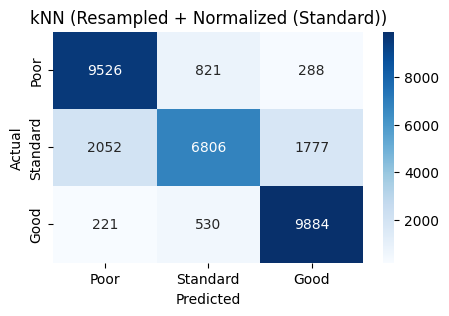

In [103]:
# Create and train a classification model using StandardScaler
std_knn_model = KNeighborsClassifier(n_neighbors=5)
std_knn_model.fit(X_train_resampled_SC, y_train_resampled)

# Make predictions on the testing set
knn_pred_resampled_SC = std_knn_model.predict(X_test_resampled_SC)
knn_pred_resampled_SC_prob = std_knn_model.predict_proba(X_test_resampled_SC)

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, knn_pred_resampled_SC)
print(f"Accuracy: {accuracy}")

classification_report_result = classification_report(y_test_resampled, knn_pred_resampled_SC)
print("Classification Report:\n",
      classification_report_result)
confusion_matrix_plot('kNN (Resampled + Normalized (Standard))', confusion_matrix(y_test_resampled, knn_pred_resampled_SC))

In [104]:
# Using model whose data that was normalized using StandardScaler

# Choose k-fold cross-validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(std_knn_model, X_train_resampled_SC,
                         y_train_resampled, scoring='accuracy', cv=kfold)

# Evaluate results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.80704435 0.80684846 0.80413744 0.80825138 0.80515613]
Mean Accuracy: 0.8062875532436878


### Hyper-parameter tuning the kNN with transformed data

In [105]:
# Using GridSearch for model with Min-Max Normalized to check for the best parameters
param_grid = {
    'n_neighbors': [1, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

X_train_transformed_MM = minMaxscaler.fit_transform(X_train_transformed)
X_test_transformed_MM = minMaxscaler.fit_transform(X_test_transformed)

grid_search = GridSearchCV(
    minMax_knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_transformed_MM, y_train_transformed)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy on Validation Set:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_transformed_MM, y_test_transformed)
print("Accuracy on Test Set:", test_accuracy)

Best Hyperparameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Accuracy on Validation Set: 0.902489493836887
Accuracy on Test Set: 0.9107663375646451


In [106]:
# Using GridSearch for model with Standard Normalized to check for the best parameters
param_grid = {
    'n_neighbors': [1, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(
    std_knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_transformed_SC, y_train_transformed)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy on Validation Set:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_transformed_SC, y_test_transformed)
print("Accuracy on Test Set:", test_accuracy)

Best Hyperparameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Accuracy on Validation Set: 0.9024738220050399
Accuracy on Test Set: 0.9104529070678578


### Recompiling the kNN Model with the best hyper-parameters

Accuracy: 0.9097320169252469
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     10635
           1       0.92      0.80      0.86     10635
           2       0.92      0.98      0.95     10635

    accuracy                           0.91     31905
   macro avg       0.91      0.91      0.91     31905
weighted avg       0.91      0.91      0.91     31905



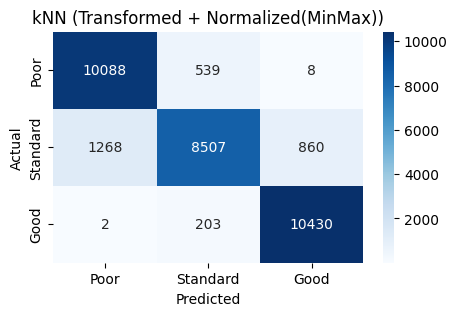

In [107]:
# Create and train a classification model using MinMaxScaler
minMax_knn_model = KNeighborsClassifier(n_neighbors=1, p=1, weights='uniform')
# knn_model.fit(X_train_normalized, y_train)
minMax_knn_model.fit(X_train_minMaxNormalized, y_train_transformed)

# Make predictions on the testing set
# predictions = knn_model.predict(X_test_normalized)
knn_pred_transformed_MM = minMax_knn_model.predict(X_test_minMaxNormalized)
knn_pred_transformed_MM_prob = minMax_knn_model.predict_proba(X_test_minMaxNormalized)

# Evaluate the model
accuracy = accuracy_score(y_test_transformed, knn_pred_transformed_MM)
print(f"Accuracy: {accuracy}")

classification_report_result = classification_report(y_test_transformed, knn_pred_transformed_MM)
print("Classification Report:\n",
      classification_report_result)
confusion_matrix_plot('kNN (Transformed + Normalized(MinMax))', confusion_matrix(y_test_transformed, knn_pred_transformed_MM))

Accuracy: 0.9104529070678578
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     10635
           1       0.92      0.80      0.86     10635
           2       0.92      0.98      0.95     10635

    accuracy                           0.91     31905
   macro avg       0.91      0.91      0.91     31905
weighted avg       0.91      0.91      0.91     31905



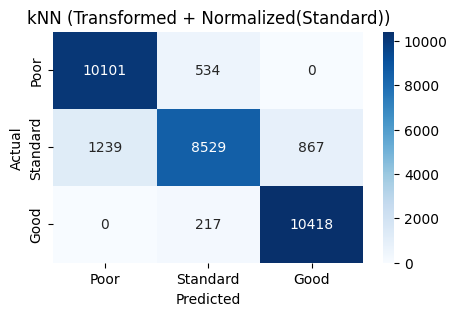

In [108]:
# Create and train a classification model using Standard_Scaler
std_knn_model = KNeighborsClassifier(n_neighbors=1, p=1, weights='uniform')
# knn_model.fit(X_train_normalized, y_train)
std_knn_model.fit(X_train_transformed_SC, y_train_transformed)

# Make predictions on the testing set
# predictions = knn_model.predict(X_test_normalized)
knn_pred_transformed_SC = std_knn_model.predict(X_test_transformed_SC)
knn_pred_transformed_SC_prob = std_knn_model.predict_proba(X_test_transformed_SC)

# Evaluate the model
accuracy = accuracy_score(y_test_transformed, knn_pred_transformed_SC)
print(f"Accuracy: {accuracy}")

classification_report_result = classification_report(y_test_transformed, knn_pred_transformed_SC)
print("Classification Report:\n",
      classification_report_result)
confusion_matrix_plot('kNN (Transformed + Normalized(Standard))', confusion_matrix(y_test_transformed, knn_pred_transformed_SC))

### Comparison of the results

In [109]:
knn_basic_summary = model_summary('kNN (Basic)', y_test, knn_pred_basic, knn_pred_basic_prob)
knn_resampled_MM_summary = model_summary('kNN (Resampled + Normalized(MinMax))', y_test_resampled, knn_pred_resampled_MM, knn_pred_resampled_MM_prob)
knn_resampled_SC_summary = model_summary('kNN (Resampled + Normalized(Standard))', y_test_resampled, knn_pred_resampled_SC, knn_pred_resampled_SC_prob)
knn_transformed_MM_summary = model_summary('kNN (Transformed + Normalized(MinMax))', y_test_transformed, knn_pred_transformed_MM, knn_pred_transformed_MM_prob)
knn_transformed_SC_summary = model_summary('kNN (Transformed + Normalized(Standard))', y_test_transformed, knn_pred_transformed_SC, knn_pred_transformed_SC_prob)

knn_summary = pd.concat([knn_basic_summary, knn_resampled_MM_summary, knn_resampled_SC_summary, knn_transformed_MM_summary, knn_transformed_SC_summary])
knn_summary

Model  Accuracy  ROC-AUC Score  \
0                               kNN (Basic)  0.804300       0.921987   
0      kNN (Resampled + Normalized(MinMax))  0.803761       0.920635   
0    kNN (Resampled + Normalized(Standard))  0.821689       0.929057   
0    kNN (Transformed + Normalized(MinMax))  0.909732       0.932299   
0  kNN (Transformed + Normalized(Standard))  0.910453       0.932840   

   Precision (Good)  Recall (Good)  F1-score (Good)  Precision (Standard)  \
0          0.780824       0.839800         0.809239              0.835172   
0          0.789859       0.871556         0.828699              0.816249   
0          0.807357       0.895722         0.849247              0.834375   
0          0.888185       0.948566         0.917383              0.919775   
0          0.890741       0.949788         0.919317              0.919073   

   Recall (Standard)  F1-score (Standard)  Precision (Poor)  Recall (Poor)  \
0           0.789939             0.811926          0.759989       0.789400   
0           0.624448             0.707581          0.808875       0.915280   
0           0.639962             0.724351          0.827182       0.929384   
0           0.799906             0.855663          0.923172       0.980724   
0           0.801975             0.856540          0.923172       0.979596   

   F1-score (Poor)  
0         0.774415  
0         0.858794  
0         0.875310  
0         0.951078  
0         0.950547

## Random Forest

### Random Forest with basic data

Test
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      5799
           1       0.87      0.84      0.85     10635
           2       0.82      0.82      0.82      3566

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.85      0.84      0.84     20000



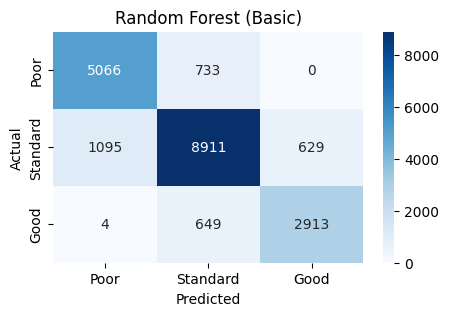

In [110]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    class_weight= 'balanced',
    n_estimators= 100,
    random_state= 42
)

rfc.fit(X_train, y_train)

rfc_pred_basic = rfc.predict(X_test)
rfc_pred_basic_prob = rfc.predict_proba(X_test)

# Printing of classification report and confusion matrix
print("Test")
print(classification_report(y_test, rfc_pred_basic))
confusion_matrix_plot('Random Forest (Basic)', confusion_matrix(y_test, rfc_pred_basic))

### Random Forest with resampled data

Test
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10635
           1       0.96      0.81      0.88     10635
           2       0.93      0.99      0.96     10635

    accuracy                           0.92     31905
   macro avg       0.93      0.92      0.92     31905
weighted avg       0.93      0.92      0.92     31905



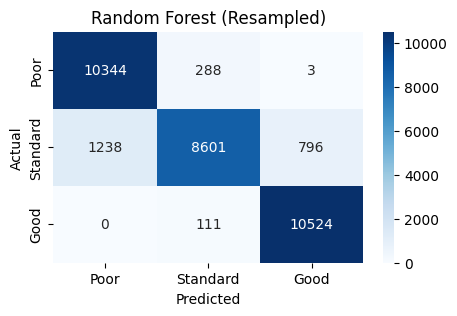

In [111]:
rfc.fit(X_train_resampled, y_train_resampled)

rfc_pred_resampled = rfc.predict(X_test_resampled)
rfc_pred_resampled_prob = rfc.predict_proba(X_test_resampled)

# Printing of classification report and confusion matrix
print("Test")
print(classification_report(y_test_resampled, rfc_pred_resampled))
confusion_matrix_plot('Random Forest (Resampled)', confusion_matrix(y_test_resampled, rfc_pred_resampled))

### Random Forest with resampled, normalized data

Test
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10635
           1       0.96      0.81      0.88     10635
           2       0.93      0.99      0.96     10635

    accuracy                           0.92     31905
   macro avg       0.93      0.92      0.92     31905
weighted avg       0.93      0.92      0.92     31905



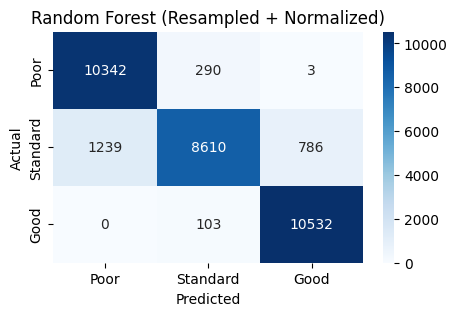

In [112]:
rfc.fit(X_train_resampled_SC, y_train_resampled)

rfc_pred_resampled_SC = rfc.predict(X_test_resampled_SC)
rfc_pred_resampled_SC_prob = rfc.predict_proba(X_test_resampled_SC)

# Printing of classification report and confusion matrix
print("Test")
print(classification_report(y_test_resampled, rfc_pred_resampled_SC))
confusion_matrix_plot('Random Forest (Resampled + Normalized)', confusion_matrix(y_test_resampled, rfc_pred_resampled_SC))

### Hyper-parameter tuning the Random Forest Model with Transformed Data

In [113]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [114]:
model = RandomForestClassifier(
    class_weight= 'balanced',
    n_estimators= 100,
    random_state= 42
)

params = {
    'class_weight': ['balanced'],
    'n_estimators': [75, 100],
    'criterion'   : ["gini", "entropy"],
    'max_features': ['sqrt', None],
    'min_samples_split': [2, 5, 10],
    'max_depth' : [10, 20, None]
}

gridSearch = GridSearchCV(
    estimator = model,
    param_grid = params,
    error_score='raise',
    n_jobs = -1,
    refit=True,
    cv=5,
)

gridSearch.fit(X_train_transformed_SC, y_train_transformed)

bestParams = gridSearch.best_params_

Test with tuned Hyperparameters

Parameters: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10635
           1       0.96      0.81      0.88     10635
           2       0.93      0.99      0.96     10635

    accuracy                           0.92     31905
   macro avg       0.93      0.92      0.92     31905
weighted avg       0.93      0.92      0.92     31905



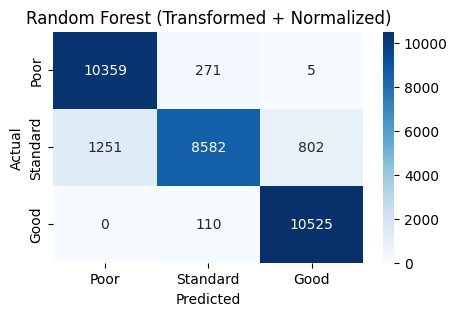

In [115]:
finalModel = RandomForestClassifier(**bestParams)

finalModel.fit(X_train_transformed_SC, y_train_transformed)

rfc_pred_transformed = finalModel.predict(X_test_transformed_SC)
rfc_pred_transformed_prob = finalModel.predict_proba(X_test_transformed_SC)

# Printing of classification report and confusion matrix
print("Test with tuned Hyperparameters")
print()
print("Parameters: ")
print(finalModel.get_params())
print()
print("Classification report: ")
print(classification_report(y_test_transformed, rfc_pred_transformed))
confusion_matrix_plot('Random Forest (Transformed + Normalized)', confusion_matrix(y_test_transformed, rfc_pred_transformed))

### Comparison of the results

In [116]:
rfc_basic_summary = model_summary('Random Forest (Basic)', y_test, rfc_pred_basic, rfc_pred_basic_prob)
rfc_resampled_summary = model_summary('Random Forest (Resampled)', y_test_resampled, rfc_pred_resampled, rfc_pred_resampled_prob)
rfc_resampled_SC_summary = model_summary('Random Forest (Resampled + Normalized)', y_test_resampled, rfc_pred_resampled_SC, rfc_pred_resampled_SC_prob)
rfc_transformed_SC_summary = model_summary('Random Forest (Transformed + Normalized)', y_test_transformed, rfc_pred_transformed, rfc_pred_transformed_prob)

rfc_summary = pd.concat([rfc_basic_summary, rfc_resampled_summary, rfc_resampled_SC_summary, rfc_transformed_SC_summary])
rfc_summary

Model  Accuracy  ROC-AUC Score  \
0                     Random Forest (Basic)  0.844500       0.944504   
0                 Random Forest (Resampled)  0.923648       0.984035   
0    Random Forest (Resampled + Normalized)  0.924118       0.984170   
0  Random Forest (Transformed + Normalized)  0.923554       0.983616   

   Precision (Good)  Recall (Good)  F1-score (Good)  Precision (Standard)  \
0          0.821736       0.873599         0.846874              0.865734   
0          0.893110       0.972638         0.931179              0.955667   
0          0.893014       0.972449         0.931041              0.956348   
0          0.892248       0.974048         0.931355              0.957492   

   Recall (Standard)  F1-score (Standard)  Precision (Poor)  Recall (Poor)  \
0           0.837894             0.851586          0.822417       0.816882   
0           0.808745             0.876089          0.929436       0.989563   
0           0.809591             0.876871          0.930307       0.990315   
0           0.806958             0.875804          0.928786       0.989657   

   F1-score (Poor)  
0         0.819640  
0         0.958557  
0         0.959373  
0         0.958256

# 6. Model Evaluation

In [117]:
# Show the summary of all models
overall_summary = pd.concat([gnb_summary, ann_summary, knn_summary, rfc_summary])
overall_summary

Model  Accuracy  ROC-AUC Score  \
0                     Gaussian Naive Bayes (Basic)  0.586500       0.767024   
0                 Gaussian Naive Bayes (Resampled)  0.637079       0.784156   
0    Gaussian Naive Bayes (Resampled + Normalized)  0.672183       0.794185   
0  Gaussian Naive Bayes (Transformed + Normalized)  0.665131       0.790039   
0                                      ANN (Basic)  0.622700       0.773137   
0                                  ANN (Resampled)  0.605861       0.745290   
0                     ANN (Resampled + Normalized)  0.886162       0.948996   
0                   ANN (Transformed + Normalized)  0.887604       0.952555   
0                                      kNN (Basic)  0.804300       0.921987   
0             kNN (Resampled + Normalized(MinMax))  0.803761       0.920635   
0           kNN (Resampled + Normalized(Standard))  0.821689       0.929057   
0           kNN (Transformed + Normalized(MinMax))  0.909732       0.932299   
0         kNN (Transformed + Normalized(Standard))  0.910453       0.932840   
0                            Random Forest (Basic)  0.844500       0.944504   
0                        Random Forest (Resampled)  0.923648       0.984035   
0           Random Forest (Resampled + Normalized)  0.924118       0.984170   
0         Random Forest (Transformed + Normalized)  0.923554       0.983616   

   Precision (Good)  Recall (Good)  F1-score (Good)  Precision (Standard)  \
0          0.611639       0.732195         0.666510              0.814808   
0          0.693555       0.751857         0.721530              0.673963   
0          0.705110       0.747344         0.725613              0.702940   
0          0.732013       0.736624         0.734311              0.698594   
0          0.659757       0.598207         0.627476              0.614723   
0          0.713228       0.733615         0.723278              0.489401   
0          0.863222       0.934650         0.897517              0.887634   
0          0.875814       0.923084         0.898828              0.876575   
0          0.780824       0.839800         0.809239              0.835172   
0          0.789859       0.871556         0.828699              0.816249   
0          0.807357       0.895722         0.849247              0.834375   
0          0.888185       0.948566         0.917383              0.919775   
0          0.890741       0.949788         0.919317              0.919073   
0          0.821736       0.873599         0.846874              0.865734   
0          0.893110       0.972638         0.931179              0.955667   
0          0.893014       0.972449         0.931041              0.956348   
0          0.892248       0.974048         0.931355              0.957492   

   Recall (Standard)  F1-score (Standard)  Precision (Poor)  Recall (Poor)  \
0           0.423225             0.557089          0.395938       0.836511   
0           0.277950             0.393582          0.586241       0.881429   
0           0.406958             0.515484          0.633462       0.862247   
0           0.378561             0.491035          0.606282       0.880207   
0           0.813446             0.700259          0.499253       0.093662   
0           0.421157             0.452721          0.596665       0.662811   
0           0.761354             0.819659          0.908413       0.962482   
0           0.778655             0.824719          0.908614       0.961072   
0           0.789939             0.811926          0.759989       0.789400   
0           0.624448             0.707581          0.808875       0.915280   
0           0.639962             0.724351          0.827182       0.929384   
0           0.799906             0.855663          0.923172       0.980724   
0           0.801975             0.856540          0.923172       0.979596   
0           0.837894             0.851586          0.822417       0.816882   
0           0.808745             0.876089          0.929436      

In [118]:
# Show the summary, sort by Accuracy
overall_summary.sort_values(by=['Accuracy'])

Model  Accuracy  ROC-AUC Score  \
0                     Gaussian Naive Bayes (Basic)  0.586500       0.767024   
0                                  ANN (Resampled)  0.605861       0.745290   
0                                      ANN (Basic)  0.622700       0.773137   
0                 Gaussian Naive Bayes (Resampled)  0.637079       0.784156   
0  Gaussian Naive Bayes (Transformed + Normalized)  0.665131       0.790039   
0    Gaussian Naive Bayes (Resampled + Normalized)  0.672183       0.794185   
0             kNN (Resampled + Normalized(MinMax))  0.803761       0.920635   
0                                      kNN (Basic)  0.804300       0.921987   
0           kNN (Resampled + Normalized(Standard))  0.821689       0.929057   
0                            Random Forest (Basic)  0.844500       0.944504   
0                     ANN (Resampled + Normalized)  0.886162       0.948996   
0                   ANN (Transformed + Normalized)  0.887604       0.952555   
0           kNN (Transformed + Normalized(MinMax))  0.909732       0.932299   
0         kNN (Transformed + Normalized(Standard))  0.910453       0.932840   
0         Random Forest (Transformed + Normalized)  0.923554       0.983616   
0                        Random Forest (Resampled)  0.923648       0.984035   
0           Random Forest (Resampled + Normalized)  0.924118       0.984170   

   Precision (Good)  Recall (Good)  F1-score (Good)  Precision (Standard)  \
0          0.611639       0.732195         0.666510              0.814808   
0          0.713228       0.733615         0.723278              0.489401   
0          0.659757       0.598207         0.627476              0.614723   
0          0.693555       0.751857         0.721530              0.673963   
0          0.732013       0.736624         0.734311              0.698594   
0          0.705110       0.747344         0.725613              0.702940   
0          0.789859       0.871556         0.828699              0.816249   
0          0.780824       0.839800         0.809239              0.835172   
0          0.807357       0.895722         0.849247              0.834375   
0          0.821736       0.873599         0.846874              0.865734   
0          0.863222       0.934650         0.897517              0.887634   
0          0.875814       0.923084         0.898828              0.876575   
0          0.888185       0.948566         0.917383              0.919775   
0          0.890741       0.949788         0.919317              0.919073   
0          0.892248       0.974048         0.931355              0.957492   
0          0.893110       0.972638         0.931179              0.955667   
0          0.893014       0.972449         0.931041              0.956348   

   Recall (Standard)  F1-score (Standard)  Precision (Poor)  Recall (Poor)  \
0           0.423225             0.557089          0.395938       0.836511   
0           0.421157             0.452721          0.596665       0.662811   
0           0.813446             0.700259          0.499253       0.093662   
0           0.277950             0.393582          0.586241       0.881429   
0           0.378561             0.491035          0.606282       0.880207   
0           0.406958             0.515484          0.633462       0.862247   
0           0.624448             0.707581          0.808875       0.915280   
0           0.789939             0.811926          0.759989       0.789400   
0           0.639962             0.724351          0.827182       0.929384   
0           0.837894             0.851586          0.822417       0.816882   
0           0.761354             0.819659          0.908413       0.962482   
0           0.778655             0.824719          0.908614       0.961072   
0           0.799906             0.855663          0.923172       0.980724   
0           0.801975             0.856540          0.923172       0.979596   
0           0.806958             0.875804          0.928786      

In [119]:
# Show the best accuracy models of each implementations
gnb_highest_accuracy = gnb_summary[gnb_summary['Accuracy'] == gnb_summary['Accuracy'].max()]
ann_highest_accuracy = ann_summary[ann_summary['Accuracy'] == ann_summary['Accuracy'].max()]
knn_highest_accuracy = knn_summary[knn_summary['Accuracy'] == knn_summary['Accuracy'].max()]
rfc_highest_accuracy = rfc_summary[rfc_summary['Accuracy'] == rfc_summary['Accuracy'].max()]
best_model_summary = pd.concat([gnb_highest_accuracy, ann_highest_accuracy, knn_highest_accuracy, rfc_highest_accuracy])
best_model_summary.sort_values(by=['Accuracy'])

Model  Accuracy  ROC-AUC Score  \
0  Gaussian Naive Bayes (Resampled + Normalized)  0.672183       0.794185   
0                 ANN (Transformed + Normalized)  0.887604       0.952555   
0       kNN (Transformed + Normalized(Standard))  0.910453       0.932840   
0         Random Forest (Resampled + Normalized)  0.924118       0.984170   

   Precision (Good)  Recall (Good)  F1-score (Good)  Precision (Standard)  \
0          0.705110       0.747344         0.725613              0.702940   
0          0.875814       0.923084         0.898828              0.876575   
0          0.890741       0.949788         0.919317              0.919073   
0          0.893014       0.972449         0.931041              0.956348   

   Recall (Standard)  F1-score (Standard)  Precision (Poor)  Recall (Poor)  \
0           0.406958             0.515484          0.633462       0.862247   
0           0.778655             0.824719          0.908614       0.961072   
0           0.801975             0.856540          0.923172       0.979596   
0           0.809591             0.876871          0.930307       0.990315   

   F1-score (Poor)  
0         0.730357  
0         0.934107  
0         0.950547  
0         0.959373

## Conclusion

We can find that the accuracy of all four models increases as resampling, fine tuning, and data become normalized.

Among them, the model that showed the greatest performance improvement was the ANN model, which recorded an accuracy of 88.8% based on ANN (Transformed + Normalized) from an accuracy of about 60.6% based on the original data, showing a significant increase of approximately 28.2%p.

The model that showed the highest accuracy among the four models was the Random forest model, which showed 92.4% accuracy.